In [1]:
# Importing the required modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import warnings
import pickle
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
# Importing the dataset
df = pd.read_csv('Cleaned_Soil.csv')

In [4]:
# Obtaining data specific to Anantapur

In [5]:
df = df[df['District'] == 'Krishna']
df.head()

,Unnamed: 0,Latitude,Longitude,District,Mandal,Village,SoilType,pH,EC,OC,...,B,Fe,Cu,Mn,NDVI,ARVI,EVI,GCI,NDWI,Crop
1434,1434,16.71,80.55,Krishna,G Konduru,C.H.Madhavaram,Black,8.04,0.29,0.49,...,0.63,6.23,1.77,15.20,0.020030,0.015637,0.154926,0.062061,-0.030097,Cotton
1435,1435,16.70,80.55,Krishna,G Konduru,C.H.Madhavaram,Black,7.98,0.56,0.40,...,0.55,3.70,1.06,11.12,0.022201,0.017797,0.155367,0.069264,-0.033473,Chilli
1436,1436,16.71,80.55,Krishna,G Konduru,C.H.Madhavaram,Black,8.08,0.42,0.43,...,1.19,10.85,2.37,22.73,0.020030,0.015637,0.154926,0.062061,-0.030097,Vegetables
1437,1437,16.71,80.55,Krishna,G Konduru,C.H.Madhavaram,Black,8.11,0.46,0.44,...,1.46,9.48,2.04,26.57,0.020030,0.015637,0.154926,0.062061,-0.030097,Vegetables
1438,1438,16.71,80.61,Krishna,G Konduru,Chevutur,Black,8.54,0.21,0.25,...,1.10,4.19,1.09,7.12,0.019861,0.015283,0.141737,0.064535,-0.031259,Cotton


In [6]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'District', 'Mandal', 'Village', 'ARVI', 'NDVI', 'GCI', 'NDWI'], axis = 1)
df.describe()

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,EVI
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000
mean,7.877293,0.881992,0.599737,21.031053,211.180451,5135.481203,1432.281955,105.633797,1.124436,1.755677,34.976241,7.602293,22.065714,0.388319
std,0.523106,1.572241,0.209099,14.304957,154.542433,1528.346835,609.168496,147.923428,1.016811,0.642349,28.610180,4.824919,12.788403,0.480130
min,6.070000,0.110000,0.160000,1.360000,77.000000,635.000000,165.000000,4.450000,0.140000,0.540000,1.400000,0.030000,5.500000,-0.110782
25%,7.620000,0.370000,0.430000,11.580000,133.000000,4369.750000,967.750000,23.857500,0.542500,1.300000,8.815000,2.347500,12.822500,0.187233
50%,7.980000,0.530000,0.610000,16.725000,171.000000,5295.000000,1435.500000,50.270000,0.900000,1.735000,31.950000,8.070000,19.520000,0.308601
75%,8.210000,0.807500,0.740000,27.590000,231.750000,6240.750000,1813.000000,118.027500,1.317500,2.102500,49.512500,11.770000,26.840000,0.419478
max,9.090000,20.300000,1.150000,105.720000,1572.000000,9718.000000,3730.000000,995.940000,8.840000,3.750000,166.850000,19.470000,88.540000,4.543434


In [7]:
# Analysis of SoilType

In [8]:
df.SoilType.unique()

array(['Black', 'Red', 'BLACK'], dtype=object)

In [9]:
df['SoilType'] = df['SoilType'].replace(['Black', 'BLACK'], 'Black Soil')
df['SoilType'] = df['SoilType'].replace('Red', 'Red Soil')
df.SoilType.unique()

array(['Black Soil', 'Red Soil'], dtype=object)

In [10]:
soilCount = dict(df['SoilType'].value_counts())
soilCount

{'Black Soil': 250, 'Red Soil': 16}

<BarContainer object of 2 artists>

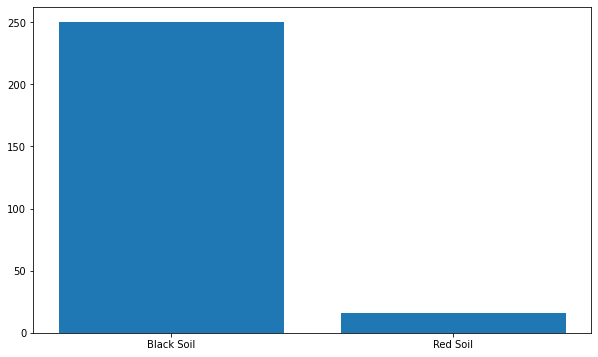

In [11]:
soilType = soilCount.keys()
soilCounts = soilCount.values()
plt.bar(soilType, soilCounts)

In [12]:
# Analysis of Crops grown 

In [13]:
df.Crop.unique()

array(['Cotton', 'Chilli', 'Vegetables', 'cotton', 'chill', 'Paddy',
       'Vegetable', 'Black gram', 'Maize', 'PULSE', 'MAZI', 'maize',
       'Mazi'], dtype=object)

In [14]:
df['Crop'].value_counts()

PULSE         80
Cotton        63
Black gram    52
Maize         31
Mazi           9
Vegetables     7
Paddy          7
Chilli         6
cotton         5
MAZI           2
Vegetable      2
maize          1
chill          1
Name: Crop, dtype: int64

Pulse        80
Cotton       68
BlackGram    52
Maize        43
Name: Crop, dtype: int64


<BarContainer object of 4 artists>

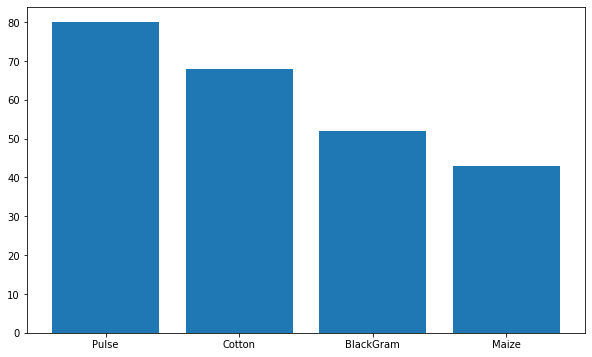

In [15]:
df['Crop'] = df['Crop'].replace('chill', 'Chilli')
df['Crop'] = df['Crop'].replace(['MAZI', 'maize', 'Mazi'], 'Maize')
df['Crop'] = df['Crop'].replace('cotton', 'Cotton')
df['Crop'] = df['Crop'].replace('Black gram', 'BlackGram')
df['Crop'] = df['Crop'].replace('PULSE', 'Pulse')
df = df[(df['Crop'] != 'Vegetable') & (df['Crop'] != 'Vegetables') & (df['Crop'] != 'Chilli') & (df['Crop'] != 'Paddy')]

print(df['Crop'].value_counts())
cropCount = dict(df['Crop'].value_counts())
cropType = cropCount.keys()
cropCounts = cropCount.values()
plt.bar(cropType, cropCounts)

In [16]:
# Getting rid of features that have a high correlation among one another

In [17]:
cor_matrix = df.corr()
cor_matrix

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,EVI
pH,1.000000,-0.194779,-0.397251,-0.345533,0.059415,-0.247552,-0.340166,-0.291813,-0.210989,-0.290784,-0.765760,-0.622046,-0.555247,-0.083885
EC,-0.194779,1.000000,0.224075,0.201661,0.273177,0.169868,0.226847,0.718952,0.072944,0.273555,0.027884,0.054795,0.087538,0.080182
OC,-0.397251,0.224075,1.000000,0.510703,0.251032,0.325660,0.292660,0.482694,0.490665,0.393414,0.545253,0.632245,0.325593,0.259459
P,-0.345533,0.201661,0.510703,1.000000,0.377933,0.005470,0.134836,0.294004,0.477350,0.353680,0.520016,0.341507,0.397529,0.130393
K,0.059415,0.273177,0.251032,0.377933,1.000000,-0.070437,-0.003110,0.328830,0.323908,0.146462,0.002124,-0.036796,0.117925,0.024632
Ca,-0.247552,0.169868,0.325660,0.005470,-0.070437,1.000000,0.805193,0.135697,0.072989,0.361858,0.327271,0.637827,0.320087,0.200007
Mg,-0.340166,0.226847,0.292660,0.134836,-0.003110,0.805193,1.000000,0.145356,0.077283,0.660054,0.426279,0.706528,0.448127,0.177747
S,-0.291813,0.718952,0.482694,0.294004,0.328830,0.135697,0.145356,1.000000,0.223393,0.299685,0.183475,0.172219,0.110838,0.215346
Zn,-0.210989,0.072944,0.490665,0.477350,0.323908,0.072989,0.077283,0.223393,1.000000,0.209275,0.427066,0.367775,0.268356,0.154485
B,-0.290784,0.273555,0.393414,0.353680,0.146462,0.361858,0.660054,0.299685,0.209275,1.000000,0.410415,0.567515,0.420113,0.157729


In [18]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Columns to be dropped : ', to_drop)
df = df.drop(to_drop, axis = 1)
print('Columns taken into consideration : ', list(df.columns))

Columns to be dropped :  ['P', 'Mg', 'S', 'B', 'Fe', 'Cu', 'Mn']
Columns taken into consideration :  ['SoilType', 'pH', 'EC', 'OC', 'K', 'Ca', 'Zn', 'EVI', 'Crop']


In [19]:
# Separating the dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [20]:
# Encoding SoilType as it is a categorical variable
X = pd.get_dummies(X, prefix='', prefix_sep='')
print(X.head(1))
print(y.head(1))
X = X.values
y = y.values

        pH    EC    OC     K      Ca    Zn       EVI  Black Soil  Red Soil
1434  8.04  0.29  0.49  98.0  4662.0  0.34  0.154926           1         0
1434    Cotton
Name: Crop, dtype: object


In [21]:
# Standardizing the independent variables using Feature Scaling
sc1 = StandardScaler()
X[:, 0:6] = sc1.fit_transform(X[:, 0:6])

In [22]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# K-Nearest Neighbors Classifier

In [23]:
clf1 = KNeighborsClassifier(weights='distance')
clf1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [24]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
AC1_train = accuracy_score(y_train, y_train_pred)
AC1_test = accuracy_score(y_test, y_test_pred)

In [25]:
print('Training Accuracy: ', AC1_train)
print('Testing Accuracy: ', AC1_test)

Training Accuracy:  1.0
Testing Accuracy:  0.6885245901639344


In [26]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 73.04 %
Standard Deviation: 7.22 %


# Decision Tree Classifier

In [27]:
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [28]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
AC2_train = accuracy_score(y_train, y_train_pred)
AC2_test = accuracy_score(y_test, y_test_pred)

In [29]:
print('Training Accuracy: ', AC2_train)
print('Testing Accuracy: ', AC2_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7704918032786885


In [30]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 69.85 %
Standard Deviation: 12.75 %


# Random Forest Classifier

In [46]:
clf3 = RandomForestClassifier(random_state=0)
clf3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [47]:
y_test_pred = clf3.predict(X_test)
y_train_pred = clf3.predict(X_train)
AC3_train = accuracy_score(y_train, y_train_pred)
AC3_test = accuracy_score(y_test, y_test_pred)

In [48]:
print('Training Accuracy: ', AC3_train)
print('Testing Accuracy: ', AC3_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7377049180327869


In [49]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf3, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 76.49 %
Standard Deviation: 11.11 %


In [50]:
# pickle.dump(clf3, open('Krishna_model.pkl', 'wb'))
# pickle.dump(sc1, open('Krishna_scaler.pkl', 'wb'))

# XGBoost

In [51]:
clf4 = HistGradientBoostingClassifier(random_state=0)
clf4.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [52]:
y_test_pred = clf4.predict(X_test)
y_train_pred = clf4.predict(X_train)
AC4_train = accuracy_score(y_train, y_train_pred)
AC4_test = accuracy_score(y_test, y_test_pred)

In [53]:
print('Training Accuracy: ', AC4_train)
print('Testing Accuracy: ', AC4_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7377049180327869


In [54]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf4, X = X_train, y = y_train, cv = 10)

In [55]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 76.40 %
Standard Deviation: 7.59 %


# Multi-layer Perceptron Classifier

In [56]:
clf5 = MLPClassifier(random_state=0, learning_rate= 'adaptive')
clf5.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', random_state=0)

In [57]:
y_test_pred = clf5.predict(X_test)
y_train_pred = clf5.predict(X_train)
AC5_train = accuracy_score(y_train, y_train_pred)
AC5_test = accuracy_score(y_test, y_test_pred)

In [58]:
print('Training Accuracy: ', AC5_train)
print('Testing Accuracy: ', AC5_test)

Training Accuracy:  0.8131868131868132
Testing Accuracy:  0.6885245901639344


In [59]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 71.46 %
Standard Deviation: 9.11 %


# Catboost

In [45]:
from catboost import CatBoostClassifier, Pool, cv

model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train)

model.calc_feature_statistics(X_train, y_train, feature=1, plot=True)

train_data = Pool(data=X_train, label=y_train)
model.get_feature_importance(train_data)

#Cross-Validation
cv_dataset = Pool(data=X_train, label=y_train)
params = {"iterations": 100, "depth": 2, "loss_function": "MultiClass", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")

model = CatBoostClassifier(loss_function='MultiClass')
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train, cv=3, plot=True)

model.score(X_test, y_test)

# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

0:	learn: 0.9155843	total: 138ms	remaining: 13.7s
1:	learn: 0.7981638	total: 140ms	remaining: 6.85s
2:	learn: 0.7119811	total: 142ms	remaining: 4.58s
3:	learn: 0.6417608	total: 143ms	remaining: 3.44s
4:	learn: 0.6032483	total: 145ms	remaining: 2.75s
5:	learn: 0.5612655	total: 147ms	remaining: 2.3s
6:	learn: 0.5045274	total: 148ms	remaining: 1.97s
7:	learn: 0.4730657	total: 150ms	remaining: 1.73s
8:	learn: 0.4486057	total: 152ms	remaining: 1.53s
9:	learn: 0.4226286	total: 153ms	remaining: 1.38s
10:	learn: 0.4133175	total: 155ms	remaining: 1.25s
11:	learn: 0.4083730	total: 157ms	remaining: 1.15s
12:	learn: 0.3800610	total: 159ms	remaining: 1.06s
13:	learn: 0.3731022	total: 160ms	remaining: 984ms
14:	learn: 0.3558900	total: 162ms	remaining: 918ms
15:	learn: 0.3474124	total: 164ms	remaining: 860ms
16:	learn: 0.3401679	total: 165ms	remaining: 808ms
17:	learn: 0.3202580	total: 167ms	remaining: 762ms
18:	learn: 0.3171519	total: 169ms	remaining: 720ms
19:	learn: 0.3087841	total: 171ms	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.8033602034
bestIteration = 99

Training on fold [1/5]

bestTest = 0.8100095619
bestIteration = 99

Training on fold [2/5]

bestTest = 0.8434393913
bestIteration = 99

Training on fold [3/5]

bestTest = 0.8426204063
bestIteration = 99

Training on fold [4/5]

bestTest = 0.8449064632
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.3594144	test: 1.3625295	best: 1.3625295 (0)	total: 1.17ms	remaining: 1.17s
1:	learn: 1.3438371	test: 1.3499183	best: 1.3499183 (1)	total: 2.16ms	remaining: 1.08s
2:	learn: 1.3227853	test: 1.3291456	best: 1.3291456 (2)	total: 2.91ms	remaining: 966ms
3:	learn: 1.3074761	test: 1.3174183	best: 1.3174183 (3)	total: 3.73ms	remaining: 929ms
4:	learn: 1.2882878	test: 1.3048552	best: 1.3048552 (4)	total: 4.54ms	remaining: 904ms
5:	learn: 1.2688023	test: 1.2864170	best: 1.2864170 (5)	total: 5.37ms	remaining: 890ms
6:	learn: 1.2522733	test: 1.2706740	best: 1.2706740 (6)	total: 6.14ms	remaining: 871ms
7:	learn: 1.2338844	test: 1.2600046	best: 1.2600046 (7)	total: 7.02ms	remaining: 870ms
8:	learn: 1.2151881	test: 1.2429895	best: 1.2429895 (8)	total: 7.97ms	remaining: 877ms
9:	learn: 1.1976293	test: 1.2320003	best: 1.2320003 (9)	total: 8.89ms	remaining: 880ms
10:	learn: 1.1831470	test: 1.2247333	best: 1.2247333 (10)	total: 9.82ms	remaining: 883ms
11:	learn: 1.1652283	test: 1.2088007	best

183:	learn: 0.4337984	test: 0.7047317	best: 0.7047317 (183)	total: 173ms	remaining: 767ms
184:	learn: 0.4324519	test: 0.7054007	best: 0.7047317 (183)	total: 174ms	remaining: 767ms
185:	learn: 0.4313552	test: 0.7050451	best: 0.7047317 (183)	total: 175ms	remaining: 767ms
186:	learn: 0.4302473	test: 0.7041376	best: 0.7041376 (186)	total: 176ms	remaining: 766ms
187:	learn: 0.4283840	test: 0.7032160	best: 0.7032160 (187)	total: 177ms	remaining: 765ms
188:	learn: 0.4263327	test: 0.7035140	best: 0.7032160 (187)	total: 178ms	remaining: 764ms
189:	learn: 0.4250316	test: 0.7028686	best: 0.7028686 (189)	total: 179ms	remaining: 763ms
190:	learn: 0.4232980	test: 0.7023347	best: 0.7023347 (190)	total: 180ms	remaining: 762ms
191:	learn: 0.4214456	test: 0.7021648	best: 0.7021648 (191)	total: 181ms	remaining: 762ms
192:	learn: 0.4199295	test: 0.7014512	best: 0.7014512 (192)	total: 182ms	remaining: 761ms
193:	learn: 0.4186874	test: 0.7007264	best: 0.7007264 (193)	total: 183ms	remaining: 760ms
194:	learn

365:	learn: 0.2535431	test: 0.6469743	best: 0.6462910 (363)	total: 345ms	remaining: 597ms
366:	learn: 0.2532498	test: 0.6469847	best: 0.6462910 (363)	total: 346ms	remaining: 597ms
367:	learn: 0.2526022	test: 0.6460400	best: 0.6460400 (367)	total: 347ms	remaining: 596ms
368:	learn: 0.2520960	test: 0.6458244	best: 0.6458244 (368)	total: 348ms	remaining: 595ms
369:	learn: 0.2513337	test: 0.6456616	best: 0.6456616 (369)	total: 349ms	remaining: 594ms
370:	learn: 0.2507499	test: 0.6453523	best: 0.6453523 (370)	total: 350ms	remaining: 593ms
371:	learn: 0.2504850	test: 0.6456292	best: 0.6453523 (370)	total: 351ms	remaining: 592ms
372:	learn: 0.2499250	test: 0.6453905	best: 0.6453523 (370)	total: 352ms	remaining: 591ms
373:	learn: 0.2493757	test: 0.6450353	best: 0.6450353 (373)	total: 353ms	remaining: 590ms
374:	learn: 0.2487664	test: 0.6438921	best: 0.6438921 (374)	total: 354ms	remaining: 590ms
375:	learn: 0.2483645	test: 0.6439529	best: 0.6438921 (374)	total: 355ms	remaining: 589ms
376:	learn

536:	learn: 0.1857543	test: 0.6203041	best: 0.6200599 (535)	total: 512ms	remaining: 441ms
537:	learn: 0.1854626	test: 0.6201645	best: 0.6200599 (535)	total: 513ms	remaining: 441ms
538:	learn: 0.1850935	test: 0.6197690	best: 0.6197690 (538)	total: 514ms	remaining: 440ms
539:	learn: 0.1847188	test: 0.6194039	best: 0.6194039 (539)	total: 515ms	remaining: 439ms
540:	learn: 0.1843848	test: 0.6200080	best: 0.6194039 (539)	total: 516ms	remaining: 438ms
541:	learn: 0.1840811	test: 0.6202092	best: 0.6194039 (539)	total: 517ms	remaining: 437ms
542:	learn: 0.1837902	test: 0.6196923	best: 0.6194039 (539)	total: 518ms	remaining: 436ms
543:	learn: 0.1835183	test: 0.6189549	best: 0.6189549 (543)	total: 518ms	remaining: 435ms
544:	learn: 0.1832823	test: 0.6188915	best: 0.6188915 (544)	total: 519ms	remaining: 434ms
545:	learn: 0.1829436	test: 0.6185032	best: 0.6185032 (545)	total: 520ms	remaining: 433ms
546:	learn: 0.1826231	test: 0.6184042	best: 0.6184042 (546)	total: 521ms	remaining: 432ms
547:	learn

714:	learn: 0.1395096	test: 0.6072062	best: 0.6059321 (686)	total: 680ms	remaining: 271ms
715:	learn: 0.1393538	test: 0.6070143	best: 0.6059321 (686)	total: 681ms	remaining: 270ms
716:	learn: 0.1390999	test: 0.6072596	best: 0.6059321 (686)	total: 682ms	remaining: 269ms
717:	learn: 0.1388190	test: 0.6073384	best: 0.6059321 (686)	total: 683ms	remaining: 268ms
718:	learn: 0.1387027	test: 0.6073835	best: 0.6059321 (686)	total: 684ms	remaining: 267ms
719:	learn: 0.1386086	test: 0.6074372	best: 0.6059321 (686)	total: 684ms	remaining: 266ms
720:	learn: 0.1385040	test: 0.6076992	best: 0.6059321 (686)	total: 685ms	remaining: 265ms
721:	learn: 0.1384107	test: 0.6078084	best: 0.6059321 (686)	total: 686ms	remaining: 264ms
722:	learn: 0.1380718	test: 0.6079534	best: 0.6059321 (686)	total: 687ms	remaining: 263ms
723:	learn: 0.1379969	test: 0.6081486	best: 0.6059321 (686)	total: 688ms	remaining: 262ms
724:	learn: 0.1377356	test: 0.6080433	best: 0.6059321 (686)	total: 689ms	remaining: 261ms
725:	learn

893:	learn: 0.1093403	test: 0.6156556	best: 0.6059321 (686)	total: 854ms	remaining: 101ms
894:	learn: 0.1092475	test: 0.6155098	best: 0.6059321 (686)	total: 855ms	remaining: 100ms
895:	learn: 0.1090994	test: 0.6156380	best: 0.6059321 (686)	total: 856ms	remaining: 99.4ms
896:	learn: 0.1088844	test: 0.6156759	best: 0.6059321 (686)	total: 857ms	remaining: 98.4ms
897:	learn: 0.1087234	test: 0.6155106	best: 0.6059321 (686)	total: 858ms	remaining: 97.5ms
898:	learn: 0.1086655	test: 0.6153922	best: 0.6059321 (686)	total: 859ms	remaining: 96.5ms
899:	learn: 0.1085808	test: 0.6151455	best: 0.6059321 (686)	total: 860ms	remaining: 95.5ms
900:	learn: 0.1084529	test: 0.6154506	best: 0.6059321 (686)	total: 861ms	remaining: 94.6ms
901:	learn: 0.1082998	test: 0.6151579	best: 0.6059321 (686)	total: 862ms	remaining: 93.7ms
902:	learn: 0.1081436	test: 0.6149676	best: 0.6059321 (686)	total: 863ms	remaining: 92.7ms
903:	learn: 0.1079761	test: 0.6149279	best: 0.6059321 (686)	total: 864ms	remaining: 91.7ms
9

47:	learn: 0.4854870	test: 0.7634224	best: 0.7634224 (47)	total: 54.2ms	remaining: 1.07s
48:	learn: 0.4802585	test: 0.7620821	best: 0.7620821 (48)	total: 55.4ms	remaining: 1.07s
49:	learn: 0.4735090	test: 0.7565721	best: 0.7565721 (49)	total: 56.4ms	remaining: 1.07s
50:	learn: 0.4670413	test: 0.7515416	best: 0.7515416 (50)	total: 57.3ms	remaining: 1.07s
51:	learn: 0.4604833	test: 0.7454849	best: 0.7454849 (51)	total: 58.3ms	remaining: 1.06s
52:	learn: 0.4551563	test: 0.7442867	best: 0.7442867 (52)	total: 59.1ms	remaining: 1.06s
53:	learn: 0.4487060	test: 0.7388433	best: 0.7388433 (53)	total: 60.1ms	remaining: 1.05s
54:	learn: 0.4422426	test: 0.7369262	best: 0.7369262 (54)	total: 61ms	remaining: 1.05s
55:	learn: 0.4365411	test: 0.7310519	best: 0.7310519 (55)	total: 61.9ms	remaining: 1.04s
56:	learn: 0.4306747	test: 0.7297142	best: 0.7297142 (56)	total: 62.7ms	remaining: 1.04s
57:	learn: 0.4276830	test: 0.7263528	best: 0.7263528 (57)	total: 63.6ms	remaining: 1.03s
58:	learn: 0.4226321	te

238:	learn: 0.1247703	test: 0.6444574	best: 0.6430391 (162)	total: 229ms	remaining: 728ms
239:	learn: 0.1242111	test: 0.6454726	best: 0.6430391 (162)	total: 230ms	remaining: 728ms
240:	learn: 0.1237837	test: 0.6468631	best: 0.6430391 (162)	total: 231ms	remaining: 727ms
241:	learn: 0.1229874	test: 0.6484618	best: 0.6430391 (162)	total: 232ms	remaining: 726ms
242:	learn: 0.1222505	test: 0.6467835	best: 0.6430391 (162)	total: 233ms	remaining: 725ms
243:	learn: 0.1216918	test: 0.6465139	best: 0.6430391 (162)	total: 234ms	remaining: 724ms
244:	learn: 0.1207153	test: 0.6479561	best: 0.6430391 (162)	total: 235ms	remaining: 724ms
245:	learn: 0.1203105	test: 0.6475978	best: 0.6430391 (162)	total: 236ms	remaining: 723ms
246:	learn: 0.1196917	test: 0.6491671	best: 0.6430391 (162)	total: 237ms	remaining: 722ms
247:	learn: 0.1190793	test: 0.6506081	best: 0.6430391 (162)	total: 238ms	remaining: 721ms
248:	learn: 0.1179671	test: 0.6505043	best: 0.6430391 (162)	total: 239ms	remaining: 720ms
249:	learn

419:	learn: 0.0649855	test: 0.6582262	best: 0.6430391 (162)	total: 395ms	remaining: 546ms
420:	learn: 0.0648691	test: 0.6574504	best: 0.6430391 (162)	total: 396ms	remaining: 545ms
421:	learn: 0.0646450	test: 0.6582425	best: 0.6430391 (162)	total: 397ms	remaining: 544ms
422:	learn: 0.0644375	test: 0.6584989	best: 0.6430391 (162)	total: 398ms	remaining: 543ms
423:	learn: 0.0642970	test: 0.6578286	best: 0.6430391 (162)	total: 399ms	remaining: 542ms
424:	learn: 0.0642016	test: 0.6576770	best: 0.6430391 (162)	total: 400ms	remaining: 541ms
425:	learn: 0.0640187	test: 0.6572342	best: 0.6430391 (162)	total: 401ms	remaining: 540ms
426:	learn: 0.0639312	test: 0.6574087	best: 0.6430391 (162)	total: 402ms	remaining: 540ms
427:	learn: 0.0637320	test: 0.6576661	best: 0.6430391 (162)	total: 403ms	remaining: 539ms
428:	learn: 0.0635212	test: 0.6567472	best: 0.6430391 (162)	total: 404ms	remaining: 538ms
429:	learn: 0.0633361	test: 0.6562422	best: 0.6430391 (162)	total: 405ms	remaining: 537ms
430:	learn

604:	learn: 0.0422334	test: 0.6658799	best: 0.6430391 (162)	total: 569ms	remaining: 371ms
605:	learn: 0.0421353	test: 0.6666921	best: 0.6430391 (162)	total: 570ms	remaining: 370ms
606:	learn: 0.0420356	test: 0.6667469	best: 0.6430391 (162)	total: 571ms	remaining: 369ms
607:	learn: 0.0419635	test: 0.6670680	best: 0.6430391 (162)	total: 572ms	remaining: 369ms
608:	learn: 0.0418826	test: 0.6660027	best: 0.6430391 (162)	total: 572ms	remaining: 368ms
609:	learn: 0.0418505	test: 0.6661875	best: 0.6430391 (162)	total: 573ms	remaining: 367ms
610:	learn: 0.0418083	test: 0.6663807	best: 0.6430391 (162)	total: 574ms	remaining: 366ms
611:	learn: 0.0417063	test: 0.6665819	best: 0.6430391 (162)	total: 575ms	remaining: 365ms
612:	learn: 0.0416167	test: 0.6657082	best: 0.6430391 (162)	total: 576ms	remaining: 364ms
613:	learn: 0.0415630	test: 0.6655766	best: 0.6430391 (162)	total: 577ms	remaining: 363ms
614:	learn: 0.0414669	test: 0.6655668	best: 0.6430391 (162)	total: 578ms	remaining: 362ms
615:	learn

783:	learn: 0.0302849	test: 0.6825117	best: 0.6430391 (162)	total: 734ms	remaining: 202ms
784:	learn: 0.0302242	test: 0.6836280	best: 0.6430391 (162)	total: 735ms	remaining: 201ms
785:	learn: 0.0301672	test: 0.6846517	best: 0.6430391 (162)	total: 736ms	remaining: 200ms
786:	learn: 0.0301092	test: 0.6852033	best: 0.6430391 (162)	total: 737ms	remaining: 200ms
787:	learn: 0.0300656	test: 0.6853200	best: 0.6430391 (162)	total: 738ms	remaining: 199ms
788:	learn: 0.0300487	test: 0.6855810	best: 0.6430391 (162)	total: 739ms	remaining: 198ms
789:	learn: 0.0299497	test: 0.6855738	best: 0.6430391 (162)	total: 740ms	remaining: 197ms
790:	learn: 0.0299250	test: 0.6854870	best: 0.6430391 (162)	total: 741ms	remaining: 196ms
791:	learn: 0.0298577	test: 0.6854903	best: 0.6430391 (162)	total: 742ms	remaining: 195ms
792:	learn: 0.0298009	test: 0.6852953	best: 0.6430391 (162)	total: 743ms	remaining: 194ms
793:	learn: 0.0297746	test: 0.6852144	best: 0.6430391 (162)	total: 744ms	remaining: 193ms
794:	learn

965:	learn: 0.0235401	test: 0.6948774	best: 0.6430391 (162)	total: 903ms	remaining: 31.8ms
966:	learn: 0.0234905	test: 0.6947065	best: 0.6430391 (162)	total: 904ms	remaining: 30.8ms
967:	learn: 0.0234691	test: 0.6947452	best: 0.6430391 (162)	total: 905ms	remaining: 29.9ms
968:	learn: 0.0234383	test: 0.6941299	best: 0.6430391 (162)	total: 906ms	remaining: 29ms
969:	learn: 0.0233820	test: 0.6943408	best: 0.6430391 (162)	total: 906ms	remaining: 28ms
970:	learn: 0.0233546	test: 0.6947708	best: 0.6430391 (162)	total: 907ms	remaining: 27.1ms
971:	learn: 0.0233229	test: 0.6955502	best: 0.6430391 (162)	total: 908ms	remaining: 26.2ms
972:	learn: 0.0233040	test: 0.6952708	best: 0.6430391 (162)	total: 909ms	remaining: 25.2ms
973:	learn: 0.0232843	test: 0.6954770	best: 0.6430391 (162)	total: 910ms	remaining: 24.3ms
974:	learn: 0.0232716	test: 0.6957711	best: 0.6430391 (162)	total: 911ms	remaining: 23.4ms
975:	learn: 0.0232439	test: 0.6956289	best: 0.6430391 (162)	total: 912ms	remaining: 22.4ms
976

123:	learn: 0.5012909	test: 0.7704739	best: 0.7704739 (123)	total: 319ms	remaining: 2.25s
124:	learn: 0.4992817	test: 0.7695063	best: 0.7695063 (124)	total: 322ms	remaining: 2.25s
125:	learn: 0.4967848	test: 0.7681189	best: 0.7681189 (125)	total: 324ms	remaining: 2.25s
126:	learn: 0.4941643	test: 0.7670471	best: 0.7670471 (126)	total: 327ms	remaining: 2.25s
127:	learn: 0.4911565	test: 0.7645545	best: 0.7645545 (127)	total: 329ms	remaining: 2.24s
128:	learn: 0.4892026	test: 0.7620610	best: 0.7620610 (128)	total: 331ms	remaining: 2.24s
129:	learn: 0.4861402	test: 0.7603177	best: 0.7603177 (129)	total: 334ms	remaining: 2.23s
130:	learn: 0.4840523	test: 0.7587833	best: 0.7587833 (130)	total: 336ms	remaining: 2.23s
131:	learn: 0.4814707	test: 0.7562911	best: 0.7562911 (131)	total: 339ms	remaining: 2.23s
132:	learn: 0.4789807	test: 0.7550943	best: 0.7550943 (132)	total: 341ms	remaining: 2.22s
133:	learn: 0.4761529	test: 0.7538779	best: 0.7538779 (133)	total: 343ms	remaining: 2.22s
134:	learn

280:	learn: 0.2544730	test: 0.6543041	best: 0.6543041 (280)	total: 678ms	remaining: 1.73s
281:	learn: 0.2535950	test: 0.6535145	best: 0.6535145 (281)	total: 681ms	remaining: 1.73s
282:	learn: 0.2532001	test: 0.6538109	best: 0.6535145 (281)	total: 683ms	remaining: 1.73s
283:	learn: 0.2524001	test: 0.6534118	best: 0.6534118 (283)	total: 685ms	remaining: 1.73s
284:	learn: 0.2515687	test: 0.6534577	best: 0.6534118 (283)	total: 687ms	remaining: 1.72s
285:	learn: 0.2507171	test: 0.6535160	best: 0.6534118 (283)	total: 690ms	remaining: 1.72s
286:	learn: 0.2498545	test: 0.6535318	best: 0.6534118 (283)	total: 692ms	remaining: 1.72s
287:	learn: 0.2488994	test: 0.6532756	best: 0.6532756 (287)	total: 695ms	remaining: 1.72s
288:	learn: 0.2480801	test: 0.6533133	best: 0.6532756 (287)	total: 697ms	remaining: 1.72s
289:	learn: 0.2470794	test: 0.6535756	best: 0.6532756 (287)	total: 700ms	remaining: 1.71s
290:	learn: 0.2464711	test: 0.6536612	best: 0.6532756 (287)	total: 702ms	remaining: 1.71s
291:	learn

433:	learn: 0.1604146	test: 0.6355982	best: 0.6355982 (433)	total: 1.03s	remaining: 1.34s
434:	learn: 0.1599295	test: 0.6359599	best: 0.6355982 (433)	total: 1.03s	remaining: 1.34s
435:	learn: 0.1596045	test: 0.6357384	best: 0.6355982 (433)	total: 1.03s	remaining: 1.34s
436:	learn: 0.1591439	test: 0.6355853	best: 0.6355853 (436)	total: 1.03s	remaining: 1.33s
437:	learn: 0.1589168	test: 0.6353942	best: 0.6353942 (437)	total: 1.04s	remaining: 1.33s
438:	learn: 0.1583593	test: 0.6358194	best: 0.6353942 (437)	total: 1.04s	remaining: 1.33s
439:	learn: 0.1580859	test: 0.6354692	best: 0.6353942 (437)	total: 1.04s	remaining: 1.33s
440:	learn: 0.1579111	test: 0.6358483	best: 0.6353942 (437)	total: 1.04s	remaining: 1.32s
441:	learn: 0.1575377	test: 0.6356453	best: 0.6353942 (437)	total: 1.05s	remaining: 1.32s
442:	learn: 0.1571107	test: 0.6356346	best: 0.6353942 (437)	total: 1.05s	remaining: 1.32s
443:	learn: 0.1566851	test: 0.6351323	best: 0.6351323 (443)	total: 1.05s	remaining: 1.32s
444:	learn

596:	learn: 0.1113467	test: 0.6311107	best: 0.6305393 (594)	total: 1.39s	remaining: 938ms
597:	learn: 0.1110695	test: 0.6309527	best: 0.6305393 (594)	total: 1.39s	remaining: 936ms
598:	learn: 0.1108341	test: 0.6308492	best: 0.6305393 (594)	total: 1.39s	remaining: 933ms
599:	learn: 0.1105757	test: 0.6308449	best: 0.6305393 (594)	total: 1.4s	remaining: 931ms
600:	learn: 0.1103719	test: 0.6307704	best: 0.6305393 (594)	total: 1.4s	remaining: 929ms
601:	learn: 0.1101664	test: 0.6308767	best: 0.6305393 (594)	total: 1.4s	remaining: 927ms
602:	learn: 0.1099674	test: 0.6308166	best: 0.6305393 (594)	total: 1.4s	remaining: 925ms
603:	learn: 0.1097711	test: 0.6311146	best: 0.6305393 (594)	total: 1.41s	remaining: 923ms
604:	learn: 0.1095428	test: 0.6311028	best: 0.6305393 (594)	total: 1.41s	remaining: 920ms
605:	learn: 0.1094343	test: 0.6311982	best: 0.6305393 (594)	total: 1.41s	remaining: 918ms
606:	learn: 0.1091984	test: 0.6312789	best: 0.6305393 (594)	total: 1.42s	remaining: 916ms
607:	learn: 0.

760:	learn: 0.0835997	test: 0.6268487	best: 0.6241694 (730)	total: 1.76s	remaining: 554ms
761:	learn: 0.0834268	test: 0.6272417	best: 0.6241694 (730)	total: 1.77s	remaining: 552ms
762:	learn: 0.0833708	test: 0.6272296	best: 0.6241694 (730)	total: 1.77s	remaining: 550ms
763:	learn: 0.0832884	test: 0.6270790	best: 0.6241694 (730)	total: 1.77s	remaining: 547ms
764:	learn: 0.0831531	test: 0.6270219	best: 0.6241694 (730)	total: 1.77s	remaining: 545ms
765:	learn: 0.0830968	test: 0.6271041	best: 0.6241694 (730)	total: 1.78s	remaining: 543ms
766:	learn: 0.0829639	test: 0.6270151	best: 0.6241694 (730)	total: 1.78s	remaining: 541ms
767:	learn: 0.0827969	test: 0.6274481	best: 0.6241694 (730)	total: 1.78s	remaining: 539ms
768:	learn: 0.0826782	test: 0.6278854	best: 0.6241694 (730)	total: 1.78s	remaining: 536ms
769:	learn: 0.0824881	test: 0.6280711	best: 0.6241694 (730)	total: 1.79s	remaining: 534ms
770:	learn: 0.0823616	test: 0.6281838	best: 0.6241694 (730)	total: 1.79s	remaining: 532ms
771:	learn

921:	learn: 0.0664112	test: 0.6334482	best: 0.6241694 (730)	total: 2.12s	remaining: 180ms
922:	learn: 0.0663364	test: 0.6330988	best: 0.6241694 (730)	total: 2.13s	remaining: 177ms
923:	learn: 0.0662589	test: 0.6331879	best: 0.6241694 (730)	total: 2.13s	remaining: 175ms
924:	learn: 0.0661663	test: 0.6332214	best: 0.6241694 (730)	total: 2.13s	remaining: 173ms
925:	learn: 0.0660420	test: 0.6329141	best: 0.6241694 (730)	total: 2.13s	remaining: 170ms
926:	learn: 0.0659604	test: 0.6327309	best: 0.6241694 (730)	total: 2.13s	remaining: 168ms
927:	learn: 0.0658627	test: 0.6326478	best: 0.6241694 (730)	total: 2.14s	remaining: 166ms
928:	learn: 0.0657822	test: 0.6326249	best: 0.6241694 (730)	total: 2.14s	remaining: 164ms
929:	learn: 0.0656781	test: 0.6326601	best: 0.6241694 (730)	total: 2.14s	remaining: 161ms
930:	learn: 0.0655221	test: 0.6329089	best: 0.6241694 (730)	total: 2.15s	remaining: 159ms
931:	learn: 0.0654209	test: 0.6329017	best: 0.6241694 (730)	total: 2.15s	remaining: 157ms
932:	learn

76:	learn: 0.2952401	test: 0.6445242	best: 0.6445242 (76)	total: 173ms	remaining: 2.07s
77:	learn: 0.2920336	test: 0.6456961	best: 0.6445242 (76)	total: 175ms	remaining: 2.07s
78:	learn: 0.2899516	test: 0.6462896	best: 0.6445242 (76)	total: 177ms	remaining: 2.07s
79:	learn: 0.2862001	test: 0.6481442	best: 0.6445242 (76)	total: 180ms	remaining: 2.07s
80:	learn: 0.2821552	test: 0.6449677	best: 0.6445242 (76)	total: 182ms	remaining: 2.06s
81:	learn: 0.2775582	test: 0.6430150	best: 0.6430150 (81)	total: 184ms	remaining: 2.06s
82:	learn: 0.2746132	test: 0.6424907	best: 0.6424907 (82)	total: 187ms	remaining: 2.06s
83:	learn: 0.2710136	test: 0.6417345	best: 0.6417345 (83)	total: 189ms	remaining: 2.06s
84:	learn: 0.2676027	test: 0.6416697	best: 0.6416697 (84)	total: 192ms	remaining: 2.06s
85:	learn: 0.2648813	test: 0.6395267	best: 0.6395267 (85)	total: 194ms	remaining: 2.07s
86:	learn: 0.2615644	test: 0.6377524	best: 0.6377524 (86)	total: 197ms	remaining: 2.06s
87:	learn: 0.2580839	test: 0.636

233:	learn: 0.0836920	test: 0.6036100	best: 0.5945223 (184)	total: 532ms	remaining: 1.74s
234:	learn: 0.0831429	test: 0.6039935	best: 0.5945223 (184)	total: 535ms	remaining: 1.74s
235:	learn: 0.0826374	test: 0.6039884	best: 0.5945223 (184)	total: 537ms	remaining: 1.74s
236:	learn: 0.0822034	test: 0.6039017	best: 0.5945223 (184)	total: 539ms	remaining: 1.73s
237:	learn: 0.0818797	test: 0.6033549	best: 0.5945223 (184)	total: 541ms	remaining: 1.73s
238:	learn: 0.0817010	test: 0.6035530	best: 0.5945223 (184)	total: 543ms	remaining: 1.73s
239:	learn: 0.0813252	test: 0.6037499	best: 0.5945223 (184)	total: 546ms	remaining: 1.73s
240:	learn: 0.0808347	test: 0.6035323	best: 0.5945223 (184)	total: 548ms	remaining: 1.73s
241:	learn: 0.0804743	test: 0.6032516	best: 0.5945223 (184)	total: 551ms	remaining: 1.73s
242:	learn: 0.0799522	test: 0.6045622	best: 0.5945223 (184)	total: 554ms	remaining: 1.72s
243:	learn: 0.0795419	test: 0.6049249	best: 0.5945223 (184)	total: 556ms	remaining: 1.72s
244:	learn

389:	learn: 0.0449172	test: 0.6217729	best: 0.5945223 (184)	total: 884ms	remaining: 1.38s
390:	learn: 0.0447750	test: 0.6219338	best: 0.5945223 (184)	total: 887ms	remaining: 1.38s
391:	learn: 0.0446423	test: 0.6218282	best: 0.5945223 (184)	total: 889ms	remaining: 1.38s
392:	learn: 0.0445071	test: 0.6222677	best: 0.5945223 (184)	total: 892ms	remaining: 1.38s
393:	learn: 0.0444283	test: 0.6221232	best: 0.5945223 (184)	total: 894ms	remaining: 1.38s
394:	learn: 0.0443087	test: 0.6219697	best: 0.5945223 (184)	total: 896ms	remaining: 1.37s
395:	learn: 0.0441515	test: 0.6227504	best: 0.5945223 (184)	total: 899ms	remaining: 1.37s
396:	learn: 0.0440464	test: 0.6225805	best: 0.5945223 (184)	total: 901ms	remaining: 1.37s
397:	learn: 0.0439422	test: 0.6228126	best: 0.5945223 (184)	total: 903ms	remaining: 1.37s
398:	learn: 0.0438509	test: 0.6225045	best: 0.5945223 (184)	total: 906ms	remaining: 1.36s
399:	learn: 0.0436988	test: 0.6230528	best: 0.5945223 (184)	total: 909ms	remaining: 1.36s
400:	learn

547:	learn: 0.0300504	test: 0.6388628	best: 0.5945223 (184)	total: 1.24s	remaining: 1.03s
548:	learn: 0.0299860	test: 0.6390581	best: 0.5945223 (184)	total: 1.25s	remaining: 1.02s
549:	learn: 0.0299141	test: 0.6387480	best: 0.5945223 (184)	total: 1.25s	remaining: 1.02s
550:	learn: 0.0298302	test: 0.6390103	best: 0.5945223 (184)	total: 1.25s	remaining: 1.02s
551:	learn: 0.0297272	test: 0.6394508	best: 0.5945223 (184)	total: 1.25s	remaining: 1.02s
552:	learn: 0.0296530	test: 0.6391695	best: 0.5945223 (184)	total: 1.26s	remaining: 1.01s
553:	learn: 0.0295865	test: 0.6394220	best: 0.5945223 (184)	total: 1.26s	remaining: 1.01s
554:	learn: 0.0295413	test: 0.6398331	best: 0.5945223 (184)	total: 1.26s	remaining: 1.01s
555:	learn: 0.0294685	test: 0.6398509	best: 0.5945223 (184)	total: 1.26s	remaining: 1.01s
556:	learn: 0.0293981	test: 0.6399615	best: 0.5945223 (184)	total: 1.27s	remaining: 1.01s
557:	learn: 0.0293123	test: 0.6400243	best: 0.5945223 (184)	total: 1.27s	remaining: 1s
558:	learn: 0

702:	learn: 0.0222730	test: 0.6522710	best: 0.5945223 (184)	total: 1.6s	remaining: 675ms
703:	learn: 0.0222417	test: 0.6524263	best: 0.5945223 (184)	total: 1.6s	remaining: 672ms
704:	learn: 0.0221993	test: 0.6528202	best: 0.5945223 (184)	total: 1.6s	remaining: 670ms
705:	learn: 0.0221621	test: 0.6527270	best: 0.5945223 (184)	total: 1.6s	remaining: 668ms
706:	learn: 0.0221271	test: 0.6523677	best: 0.5945223 (184)	total: 1.61s	remaining: 666ms
707:	learn: 0.0220816	test: 0.6525396	best: 0.5945223 (184)	total: 1.61s	remaining: 664ms
708:	learn: 0.0220476	test: 0.6527039	best: 0.5945223 (184)	total: 1.61s	remaining: 661ms
709:	learn: 0.0220152	test: 0.6530918	best: 0.5945223 (184)	total: 1.61s	remaining: 659ms
710:	learn: 0.0219703	test: 0.6529259	best: 0.5945223 (184)	total: 1.62s	remaining: 657ms
711:	learn: 0.0219340	test: 0.6533820	best: 0.5945223 (184)	total: 1.62s	remaining: 655ms
712:	learn: 0.0218992	test: 0.6542308	best: 0.5945223 (184)	total: 1.62s	remaining: 653ms
713:	learn: 0.

857:	learn: 0.0174918	test: 0.6679279	best: 0.5945223 (184)	total: 1.97s	remaining: 326ms
858:	learn: 0.0174775	test: 0.6677028	best: 0.5945223 (184)	total: 1.97s	remaining: 324ms
859:	learn: 0.0174457	test: 0.6679245	best: 0.5945223 (184)	total: 1.97s	remaining: 321ms
860:	learn: 0.0174236	test: 0.6679837	best: 0.5945223 (184)	total: 1.98s	remaining: 319ms
861:	learn: 0.0174097	test: 0.6678997	best: 0.5945223 (184)	total: 1.98s	remaining: 317ms
862:	learn: 0.0173922	test: 0.6680520	best: 0.5945223 (184)	total: 1.98s	remaining: 315ms
863:	learn: 0.0173564	test: 0.6682517	best: 0.5945223 (184)	total: 1.98s	remaining: 312ms
864:	learn: 0.0173329	test: 0.6681811	best: 0.5945223 (184)	total: 1.99s	remaining: 310ms
865:	learn: 0.0173044	test: 0.6688141	best: 0.5945223 (184)	total: 1.99s	remaining: 308ms
866:	learn: 0.0172866	test: 0.6692314	best: 0.5945223 (184)	total: 1.99s	remaining: 306ms
867:	learn: 0.0172667	test: 0.6693508	best: 0.5945223 (184)	total: 1.99s	remaining: 303ms
868:	learn

986:	learn: 0.0147864	test: 0.6760038	best: 0.5945223 (184)	total: 2.32s	remaining: 30.6ms
987:	learn: 0.0147722	test: 0.6762489	best: 0.5945223 (184)	total: 2.32s	remaining: 28.2ms
988:	learn: 0.0147548	test: 0.6767450	best: 0.5945223 (184)	total: 2.33s	remaining: 25.9ms
989:	learn: 0.0147392	test: 0.6767851	best: 0.5945223 (184)	total: 2.33s	remaining: 23.5ms
990:	learn: 0.0147175	test: 0.6766393	best: 0.5945223 (184)	total: 2.33s	remaining: 21.2ms
991:	learn: 0.0146908	test: 0.6767386	best: 0.5945223 (184)	total: 2.33s	remaining: 18.8ms
992:	learn: 0.0146773	test: 0.6770759	best: 0.5945223 (184)	total: 2.34s	remaining: 16.5ms
993:	learn: 0.0146585	test: 0.6769518	best: 0.5945223 (184)	total: 2.34s	remaining: 14.1ms
994:	learn: 0.0146405	test: 0.6770280	best: 0.5945223 (184)	total: 2.34s	remaining: 11.8ms
995:	learn: 0.0146225	test: 0.6773441	best: 0.5945223 (184)	total: 2.35s	remaining: 9.42ms
996:	learn: 0.0146065	test: 0.6775261	best: 0.5945223 (184)	total: 2.35s	remaining: 7.07ms

80:	learn: 0.6803679	test: 0.9330395	best: 0.9330395 (80)	total: 3.54s	remaining: 40.2s
81:	learn: 0.6760372	test: 0.9294457	best: 0.9294457 (81)	total: 3.58s	remaining: 40.1s
82:	learn: 0.6720132	test: 0.9277077	best: 0.9277077 (82)	total: 3.63s	remaining: 40.1s
83:	learn: 0.6667814	test: 0.9231837	best: 0.9231837 (83)	total: 3.68s	remaining: 40.1s
84:	learn: 0.6617110	test: 0.9213110	best: 0.9213110 (84)	total: 3.73s	remaining: 40.1s
85:	learn: 0.6571114	test: 0.9177205	best: 0.9177205 (85)	total: 3.78s	remaining: 40.2s
86:	learn: 0.6524314	test: 0.9148589	best: 0.9148589 (86)	total: 3.83s	remaining: 40.2s
87:	learn: 0.6480424	test: 0.9125497	best: 0.9125497 (87)	total: 3.88s	remaining: 40.2s
88:	learn: 0.6442107	test: 0.9101343	best: 0.9101343 (88)	total: 3.93s	remaining: 40.2s
89:	learn: 0.6398029	test: 0.9081638	best: 0.9081638 (89)	total: 3.98s	remaining: 40.3s
90:	learn: 0.6358176	test: 0.9066373	best: 0.9066373 (90)	total: 4.03s	remaining: 40.3s
91:	learn: 0.6320445	test: 0.904

174:	learn: 0.3998894	test: 0.7968381	best: 0.7968381 (174)	total: 7.95s	remaining: 37.5s
175:	learn: 0.3978540	test: 0.7963486	best: 0.7963486 (175)	total: 8s	remaining: 37.5s
176:	learn: 0.3957219	test: 0.7954458	best: 0.7954458 (176)	total: 8.05s	remaining: 37.4s
177:	learn: 0.3939156	test: 0.7951601	best: 0.7951601 (177)	total: 8.11s	remaining: 37.4s
178:	learn: 0.3922432	test: 0.7944768	best: 0.7944768 (178)	total: 8.16s	remaining: 37.4s
179:	learn: 0.3905323	test: 0.7940732	best: 0.7940732 (179)	total: 8.21s	remaining: 37.4s
180:	learn: 0.3889360	test: 0.7930404	best: 0.7930404 (180)	total: 8.26s	remaining: 37.4s
181:	learn: 0.3873203	test: 0.7925926	best: 0.7925926 (181)	total: 8.3s	remaining: 37.3s
182:	learn: 0.3857981	test: 0.7920169	best: 0.7920169 (182)	total: 8.35s	remaining: 37.3s
183:	learn: 0.3840079	test: 0.7913214	best: 0.7913214 (183)	total: 8.4s	remaining: 37.2s
184:	learn: 0.3822262	test: 0.7908155	best: 0.7908155 (184)	total: 8.44s	remaining: 37.2s
185:	learn: 0.3

270:	learn: 0.2623389	test: 0.7480585	best: 0.7480585 (270)	total: 12.6s	remaining: 33.9s
271:	learn: 0.2614126	test: 0.7480476	best: 0.7480476 (271)	total: 12.6s	remaining: 33.8s
272:	learn: 0.2604069	test: 0.7480202	best: 0.7480202 (272)	total: 12.7s	remaining: 33.8s
273:	learn: 0.2594790	test: 0.7475895	best: 0.7475895 (273)	total: 12.7s	remaining: 33.8s
274:	learn: 0.2584876	test: 0.7471472	best: 0.7471472 (274)	total: 12.8s	remaining: 33.7s
275:	learn: 0.2574976	test: 0.7470399	best: 0.7470399 (275)	total: 12.8s	remaining: 33.7s
276:	learn: 0.2565208	test: 0.7468279	best: 0.7468279 (276)	total: 12.9s	remaining: 33.6s
277:	learn: 0.2554242	test: 0.7464358	best: 0.7464358 (277)	total: 12.9s	remaining: 33.6s
278:	learn: 0.2545198	test: 0.7463489	best: 0.7463489 (278)	total: 13s	remaining: 33.6s
279:	learn: 0.2534736	test: 0.7459430	best: 0.7459430 (279)	total: 13s	remaining: 33.5s
280:	learn: 0.2523352	test: 0.7456086	best: 0.7456086 (280)	total: 13.1s	remaining: 33.5s
281:	learn: 0.

365:	learn: 0.1855301	test: 0.7245516	best: 0.7244841 (362)	total: 17.2s	remaining: 29.7s
366:	learn: 0.1849749	test: 0.7245766	best: 0.7244841 (362)	total: 17.2s	remaining: 29.7s
367:	learn: 0.1844282	test: 0.7241718	best: 0.7241718 (367)	total: 17.2s	remaining: 29.6s
368:	learn: 0.1838736	test: 0.7241487	best: 0.7241487 (368)	total: 17.3s	remaining: 29.6s
369:	learn: 0.1832627	test: 0.7237159	best: 0.7237159 (369)	total: 17.3s	remaining: 29.5s
370:	learn: 0.1826217	test: 0.7237143	best: 0.7237143 (370)	total: 17.4s	remaining: 29.5s
371:	learn: 0.1821410	test: 0.7233257	best: 0.7233257 (371)	total: 17.4s	remaining: 29.4s
372:	learn: 0.1815654	test: 0.7234386	best: 0.7233257 (371)	total: 17.5s	remaining: 29.4s
373:	learn: 0.1809722	test: 0.7229450	best: 0.7229450 (373)	total: 17.5s	remaining: 29.3s
374:	learn: 0.1803540	test: 0.7229500	best: 0.7229450 (373)	total: 17.6s	remaining: 29.3s
375:	learn: 0.1797815	test: 0.7227687	best: 0.7227687 (375)	total: 17.6s	remaining: 29.2s
376:	learn

460:	learn: 0.1396944	test: 0.7087582	best: 0.7084412 (453)	total: 21.3s	remaining: 25s
461:	learn: 0.1393324	test: 0.7086400	best: 0.7084412 (453)	total: 21.4s	remaining: 24.9s
462:	learn: 0.1390031	test: 0.7088511	best: 0.7084412 (453)	total: 21.4s	remaining: 24.9s
463:	learn: 0.1386248	test: 0.7091217	best: 0.7084412 (453)	total: 21.5s	remaining: 24.8s
464:	learn: 0.1382967	test: 0.7090398	best: 0.7084412 (453)	total: 21.5s	remaining: 24.8s
465:	learn: 0.1379765	test: 0.7090802	best: 0.7084412 (453)	total: 21.6s	remaining: 24.7s
466:	learn: 0.1375969	test: 0.7089472	best: 0.7084412 (453)	total: 21.6s	remaining: 24.7s
467:	learn: 0.1372417	test: 0.7091699	best: 0.7084412 (453)	total: 21.6s	remaining: 24.6s
468:	learn: 0.1369127	test: 0.7094271	best: 0.7084412 (453)	total: 21.7s	remaining: 24.6s
469:	learn: 0.1365489	test: 0.7094850	best: 0.7084412 (453)	total: 21.7s	remaining: 24.5s
470:	learn: 0.1361548	test: 0.7089712	best: 0.7084412 (453)	total: 21.8s	remaining: 24.5s
471:	learn: 

556:	learn: 0.1095060	test: 0.7031723	best: 0.7031723 (556)	total: 25.6s	remaining: 20.3s
557:	learn: 0.1092720	test: 0.7034232	best: 0.7031723 (556)	total: 25.6s	remaining: 20.3s
558:	learn: 0.1089814	test: 0.7029511	best: 0.7029511 (558)	total: 25.7s	remaining: 20.2s
559:	learn: 0.1087269	test: 0.7028706	best: 0.7028706 (559)	total: 25.7s	remaining: 20.2s
560:	learn: 0.1085135	test: 0.7031473	best: 0.7028706 (559)	total: 25.8s	remaining: 20.2s
561:	learn: 0.1082893	test: 0.7031722	best: 0.7028706 (559)	total: 25.8s	remaining: 20.1s
562:	learn: 0.1080541	test: 0.7030548	best: 0.7028706 (559)	total: 25.8s	remaining: 20.1s
563:	learn: 0.1077937	test: 0.7031102	best: 0.7028706 (559)	total: 25.9s	remaining: 20s
564:	learn: 0.1075801	test: 0.7030781	best: 0.7028706 (559)	total: 25.9s	remaining: 20s
565:	learn: 0.1073477	test: 0.7030619	best: 0.7028706 (559)	total: 26s	remaining: 19.9s
566:	learn: 0.1071413	test: 0.7032182	best: 0.7028706 (559)	total: 26s	remaining: 19.9s
567:	learn: 0.1069

651:	learn: 0.0900838	test: 0.7000997	best: 0.6995500 (645)	total: 29.8s	remaining: 15.9s
652:	learn: 0.0899197	test: 0.7002316	best: 0.6995500 (645)	total: 29.8s	remaining: 15.9s
653:	learn: 0.0897496	test: 0.7001070	best: 0.6995500 (645)	total: 29.9s	remaining: 15.8s
654:	learn: 0.0895853	test: 0.7000144	best: 0.6995500 (645)	total: 29.9s	remaining: 15.8s
655:	learn: 0.0894370	test: 0.7001748	best: 0.6995500 (645)	total: 30s	remaining: 15.7s
656:	learn: 0.0892892	test: 0.7002562	best: 0.6995500 (645)	total: 30s	remaining: 15.7s
657:	learn: 0.0890863	test: 0.7000765	best: 0.6995500 (645)	total: 30.1s	remaining: 15.6s
658:	learn: 0.0889243	test: 0.7001306	best: 0.6995500 (645)	total: 30.1s	remaining: 15.6s
659:	learn: 0.0887912	test: 0.7000694	best: 0.6995500 (645)	total: 30.2s	remaining: 15.5s
660:	learn: 0.0886139	test: 0.7000404	best: 0.6995500 (645)	total: 30.2s	remaining: 15.5s
661:	learn: 0.0884482	test: 0.6998173	best: 0.6995500 (645)	total: 30.2s	remaining: 15.4s
662:	learn: 0.

747:	learn: 0.0759384	test: 0.6970179	best: 0.6970179 (747)	total: 34s	remaining: 11.4s
748:	learn: 0.0758180	test: 0.6969915	best: 0.6969915 (748)	total: 34s	remaining: 11.4s
749:	learn: 0.0757033	test: 0.6970482	best: 0.6969915 (748)	total: 34s	remaining: 11.3s
750:	learn: 0.0755761	test: 0.6967375	best: 0.6967375 (750)	total: 34.1s	remaining: 11.3s
751:	learn: 0.0754540	test: 0.6966841	best: 0.6966841 (751)	total: 34.1s	remaining: 11.3s
752:	learn: 0.0753191	test: 0.6965997	best: 0.6965997 (752)	total: 34.2s	remaining: 11.2s
753:	learn: 0.0752007	test: 0.6965124	best: 0.6965124 (753)	total: 34.2s	remaining: 11.2s
754:	learn: 0.0750649	test: 0.6965858	best: 0.6965124 (753)	total: 34.3s	remaining: 11.1s
755:	learn: 0.0749495	test: 0.6966034	best: 0.6965124 (753)	total: 34.3s	remaining: 11.1s
756:	learn: 0.0748361	test: 0.6966893	best: 0.6965124 (753)	total: 34.4s	remaining: 11s
757:	learn: 0.0747256	test: 0.6967415	best: 0.6965124 (753)	total: 34.4s	remaining: 11s
758:	learn: 0.074621

843:	learn: 0.0653899	test: 0.6946324	best: 0.6945523 (841)	total: 38.1s	remaining: 7.05s
844:	learn: 0.0652947	test: 0.6947103	best: 0.6945523 (841)	total: 38.2s	remaining: 7s
845:	learn: 0.0651993	test: 0.6948359	best: 0.6945523 (841)	total: 38.2s	remaining: 6.96s
846:	learn: 0.0651179	test: 0.6948232	best: 0.6945523 (841)	total: 38.3s	remaining: 6.91s
847:	learn: 0.0650076	test: 0.6946175	best: 0.6945523 (841)	total: 38.3s	remaining: 6.87s
848:	learn: 0.0649288	test: 0.6946065	best: 0.6945523 (841)	total: 38.4s	remaining: 6.82s
849:	learn: 0.0648464	test: 0.6945320	best: 0.6945320 (849)	total: 38.4s	remaining: 6.78s
850:	learn: 0.0647594	test: 0.6945121	best: 0.6945121 (850)	total: 38.4s	remaining: 6.73s
851:	learn: 0.0646559	test: 0.6944015	best: 0.6944015 (851)	total: 38.5s	remaining: 6.68s
852:	learn: 0.0645630	test: 0.6944556	best: 0.6944015 (851)	total: 38.5s	remaining: 6.64s
853:	learn: 0.0644804	test: 0.6944542	best: 0.6944015 (851)	total: 38.6s	remaining: 6.59s
854:	learn: 0

939:	learn: 0.0573946	test: 0.6933779	best: 0.6930541 (933)	total: 42.3s	remaining: 2.7s
940:	learn: 0.0573337	test: 0.6932950	best: 0.6930541 (933)	total: 42.4s	remaining: 2.66s
941:	learn: 0.0572402	test: 0.6932434	best: 0.6930541 (933)	total: 42.4s	remaining: 2.61s
942:	learn: 0.0571602	test: 0.6933276	best: 0.6930541 (933)	total: 42.5s	remaining: 2.57s
943:	learn: 0.0570882	test: 0.6933844	best: 0.6930541 (933)	total: 42.5s	remaining: 2.52s
944:	learn: 0.0570213	test: 0.6933123	best: 0.6930541 (933)	total: 42.5s	remaining: 2.48s
945:	learn: 0.0569586	test: 0.6933891	best: 0.6930541 (933)	total: 42.6s	remaining: 2.43s
946:	learn: 0.0568931	test: 0.6932695	best: 0.6930541 (933)	total: 42.6s	remaining: 2.39s
947:	learn: 0.0568018	test: 0.6933148	best: 0.6930541 (933)	total: 42.7s	remaining: 2.34s
948:	learn: 0.0567059	test: 0.6931079	best: 0.6930541 (933)	total: 42.7s	remaining: 2.3s
949:	learn: 0.0566306	test: 0.6930901	best: 0.6930541 (933)	total: 42.8s	remaining: 2.25s
950:	learn: 

32:	learn: 0.5612061	test: 0.8902422	best: 0.8902422 (32)	total: 1.28s	remaining: 37.5s
33:	learn: 0.5500015	test: 0.8845689	best: 0.8845689 (33)	total: 1.33s	remaining: 37.7s
34:	learn: 0.5388038	test: 0.8808675	best: 0.8808675 (34)	total: 1.37s	remaining: 37.8s
35:	learn: 0.5282749	test: 0.8694445	best: 0.8694445 (35)	total: 1.41s	remaining: 37.9s
36:	learn: 0.5178018	test: 0.8616682	best: 0.8616682 (36)	total: 1.46s	remaining: 37.9s
37:	learn: 0.5085138	test: 0.8581466	best: 0.8581466 (37)	total: 1.5s	remaining: 38.1s
38:	learn: 0.4998292	test: 0.8519937	best: 0.8519937 (38)	total: 1.55s	remaining: 38.1s
39:	learn: 0.4920261	test: 0.8502121	best: 0.8502121 (39)	total: 1.59s	remaining: 38.2s
40:	learn: 0.4842740	test: 0.8446313	best: 0.8446313 (40)	total: 1.64s	remaining: 38.3s
41:	learn: 0.4768970	test: 0.8392292	best: 0.8392292 (41)	total: 1.68s	remaining: 38.4s
42:	learn: 0.4696304	test: 0.8351743	best: 0.8351743 (42)	total: 1.73s	remaining: 38.5s
43:	learn: 0.4617351	test: 0.8333

127:	learn: 0.1533259	test: 0.7080232	best: 0.7080232 (127)	total: 5.46s	remaining: 37.2s
128:	learn: 0.1519140	test: 0.7073115	best: 0.7073115 (128)	total: 5.51s	remaining: 37.2s
129:	learn: 0.1505522	test: 0.7080239	best: 0.7073115 (128)	total: 5.55s	remaining: 37.1s
130:	learn: 0.1488045	test: 0.7075473	best: 0.7073115 (128)	total: 5.59s	remaining: 37.1s
131:	learn: 0.1472663	test: 0.7061317	best: 0.7061317 (131)	total: 5.63s	remaining: 37.1s
132:	learn: 0.1459563	test: 0.7043443	best: 0.7043443 (132)	total: 5.68s	remaining: 37s
133:	learn: 0.1445163	test: 0.7044534	best: 0.7043443 (132)	total: 5.73s	remaining: 37s
134:	learn: 0.1433763	test: 0.7050860	best: 0.7043443 (132)	total: 5.77s	remaining: 37s
135:	learn: 0.1419559	test: 0.7044674	best: 0.7043443 (132)	total: 5.81s	remaining: 36.9s
136:	learn: 0.1405521	test: 0.7044840	best: 0.7043443 (132)	total: 5.86s	remaining: 36.9s
137:	learn: 0.1392540	test: 0.7041011	best: 0.7041011 (137)	total: 5.91s	remaining: 36.9s
138:	learn: 0.13

223:	learn: 0.0751126	test: 0.6825855	best: 0.6824269 (222)	total: 9.63s	remaining: 33.4s
224:	learn: 0.0747052	test: 0.6823423	best: 0.6823423 (224)	total: 9.67s	remaining: 33.3s
225:	learn: 0.0743546	test: 0.6825555	best: 0.6823423 (224)	total: 9.72s	remaining: 33.3s
226:	learn: 0.0739868	test: 0.6823909	best: 0.6823423 (224)	total: 9.76s	remaining: 33.2s
227:	learn: 0.0735958	test: 0.6819809	best: 0.6819809 (227)	total: 9.8s	remaining: 33.2s
228:	learn: 0.0732386	test: 0.6820835	best: 0.6819809 (227)	total: 9.85s	remaining: 33.2s
229:	learn: 0.0728468	test: 0.6824547	best: 0.6819809 (227)	total: 9.89s	remaining: 33.1s
230:	learn: 0.0724719	test: 0.6826038	best: 0.6819809 (227)	total: 9.94s	remaining: 33.1s
231:	learn: 0.0720405	test: 0.6826033	best: 0.6819809 (227)	total: 9.99s	remaining: 33.1s
232:	learn: 0.0716929	test: 0.6825278	best: 0.6819809 (227)	total: 10s	remaining: 33s
233:	learn: 0.0712943	test: 0.6823576	best: 0.6819809 (227)	total: 10.1s	remaining: 33s
234:	learn: 0.070

319:	learn: 0.0480394	test: 0.6800613	best: 0.6790007 (302)	total: 13.8s	remaining: 29.3s
320:	learn: 0.0478780	test: 0.6800574	best: 0.6790007 (302)	total: 13.8s	remaining: 29.3s
321:	learn: 0.0476921	test: 0.6802310	best: 0.6790007 (302)	total: 13.9s	remaining: 29.2s
322:	learn: 0.0475209	test: 0.6802592	best: 0.6790007 (302)	total: 13.9s	remaining: 29.2s
323:	learn: 0.0473563	test: 0.6804394	best: 0.6790007 (302)	total: 14s	remaining: 29.1s
324:	learn: 0.0471850	test: 0.6804295	best: 0.6790007 (302)	total: 14s	remaining: 29.1s
325:	learn: 0.0470336	test: 0.6808308	best: 0.6790007 (302)	total: 14.1s	remaining: 29.1s
326:	learn: 0.0468296	test: 0.6805467	best: 0.6790007 (302)	total: 14.1s	remaining: 29s
327:	learn: 0.0466717	test: 0.6805576	best: 0.6790007 (302)	total: 14.2s	remaining: 29s
328:	learn: 0.0465176	test: 0.6804705	best: 0.6790007 (302)	total: 14.2s	remaining: 29s
329:	learn: 0.0463749	test: 0.6804268	best: 0.6790007 (302)	total: 14.2s	remaining: 28.9s
330:	learn: 0.046174

414:	learn: 0.0354472	test: 0.6822587	best: 0.6790007 (302)	total: 17.9s	remaining: 25.3s
415:	learn: 0.0353480	test: 0.6825688	best: 0.6790007 (302)	total: 18s	remaining: 25.3s
416:	learn: 0.0352310	test: 0.6826601	best: 0.6790007 (302)	total: 18s	remaining: 25.2s
417:	learn: 0.0351417	test: 0.6825813	best: 0.6790007 (302)	total: 18.1s	remaining: 25.2s
418:	learn: 0.0350434	test: 0.6826194	best: 0.6790007 (302)	total: 18.1s	remaining: 25.1s
419:	learn: 0.0349362	test: 0.6830596	best: 0.6790007 (302)	total: 18.2s	remaining: 25.1s
420:	learn: 0.0348338	test: 0.6828065	best: 0.6790007 (302)	total: 18.2s	remaining: 25s
421:	learn: 0.0347314	test: 0.6829165	best: 0.6790007 (302)	total: 18.3s	remaining: 25s
422:	learn: 0.0346448	test: 0.6831991	best: 0.6790007 (302)	total: 18.3s	remaining: 25s
423:	learn: 0.0345657	test: 0.6832687	best: 0.6790007 (302)	total: 18.3s	remaining: 24.9s
424:	learn: 0.0344814	test: 0.6831243	best: 0.6790007 (302)	total: 18.4s	remaining: 24.9s
425:	learn: 0.034389

509:	learn: 0.0278523	test: 0.6858142	best: 0.6790007 (302)	total: 22.1s	remaining: 21.2s
510:	learn: 0.0277844	test: 0.6859856	best: 0.6790007 (302)	total: 22.1s	remaining: 21.2s
511:	learn: 0.0277137	test: 0.6860531	best: 0.6790007 (302)	total: 22.2s	remaining: 21.1s
512:	learn: 0.0276546	test: 0.6859650	best: 0.6790007 (302)	total: 22.2s	remaining: 21.1s
513:	learn: 0.0276053	test: 0.6861058	best: 0.6790007 (302)	total: 22.3s	remaining: 21.1s
514:	learn: 0.0275287	test: 0.6860942	best: 0.6790007 (302)	total: 22.3s	remaining: 21s
515:	learn: 0.0274668	test: 0.6860681	best: 0.6790007 (302)	total: 22.4s	remaining: 21s
516:	learn: 0.0273926	test: 0.6862070	best: 0.6790007 (302)	total: 22.4s	remaining: 20.9s
517:	learn: 0.0273368	test: 0.6862394	best: 0.6790007 (302)	total: 22.4s	remaining: 20.9s
518:	learn: 0.0272825	test: 0.6862630	best: 0.6790007 (302)	total: 22.5s	remaining: 20.8s
519:	learn: 0.0272244	test: 0.6860842	best: 0.6790007 (302)	total: 22.5s	remaining: 20.8s
520:	learn: 0.

604:	learn: 0.0228872	test: 0.6872514	best: 0.6790007 (302)	total: 26.3s	remaining: 17.1s
605:	learn: 0.0228516	test: 0.6873608	best: 0.6790007 (302)	total: 26.3s	remaining: 17.1s
606:	learn: 0.0228100	test: 0.6872881	best: 0.6790007 (302)	total: 26.4s	remaining: 17.1s
607:	learn: 0.0227737	test: 0.6873426	best: 0.6790007 (302)	total: 26.4s	remaining: 17s
608:	learn: 0.0227331	test: 0.6874571	best: 0.6790007 (302)	total: 26.4s	remaining: 17s
609:	learn: 0.0226890	test: 0.6875149	best: 0.6790007 (302)	total: 26.5s	remaining: 16.9s
610:	learn: 0.0226554	test: 0.6875748	best: 0.6790007 (302)	total: 26.5s	remaining: 16.9s
611:	learn: 0.0226088	test: 0.6876155	best: 0.6790007 (302)	total: 26.6s	remaining: 16.8s
612:	learn: 0.0225646	test: 0.6874822	best: 0.6790007 (302)	total: 26.6s	remaining: 16.8s
613:	learn: 0.0225281	test: 0.6874967	best: 0.6790007 (302)	total: 26.7s	remaining: 16.8s
614:	learn: 0.0224934	test: 0.6875001	best: 0.6790007 (302)	total: 26.7s	remaining: 16.7s
615:	learn: 0.

699:	learn: 0.0194332	test: 0.6915017	best: 0.6790007 (302)	total: 30.5s	remaining: 13.1s
700:	learn: 0.0194069	test: 0.6914393	best: 0.6790007 (302)	total: 30.6s	remaining: 13s
701:	learn: 0.0193789	test: 0.6913370	best: 0.6790007 (302)	total: 30.6s	remaining: 13s
702:	learn: 0.0193410	test: 0.6914725	best: 0.6790007 (302)	total: 30.7s	remaining: 13s
703:	learn: 0.0193085	test: 0.6914853	best: 0.6790007 (302)	total: 30.7s	remaining: 12.9s
704:	learn: 0.0192821	test: 0.6915481	best: 0.6790007 (302)	total: 30.8s	remaining: 12.9s
705:	learn: 0.0192550	test: 0.6916005	best: 0.6790007 (302)	total: 30.8s	remaining: 12.8s
706:	learn: 0.0192192	test: 0.6915196	best: 0.6790007 (302)	total: 30.9s	remaining: 12.8s
707:	learn: 0.0191894	test: 0.6914877	best: 0.6790007 (302)	total: 30.9s	remaining: 12.7s
708:	learn: 0.0191623	test: 0.6916272	best: 0.6790007 (302)	total: 31s	remaining: 12.7s
709:	learn: 0.0191315	test: 0.6918304	best: 0.6790007 (302)	total: 31s	remaining: 12.7s
710:	learn: 0.019102

791:	learn: 0.0169248	test: 0.6935864	best: 0.6790007 (302)	total: 34.7s	remaining: 9.11s
792:	learn: 0.0169038	test: 0.6938083	best: 0.6790007 (302)	total: 34.7s	remaining: 9.07s
793:	learn: 0.0168786	test: 0.6937213	best: 0.6790007 (302)	total: 34.8s	remaining: 9.02s
794:	learn: 0.0168539	test: 0.6937852	best: 0.6790007 (302)	total: 34.8s	remaining: 8.98s
795:	learn: 0.0168315	test: 0.6939026	best: 0.6790007 (302)	total: 34.9s	remaining: 8.94s
796:	learn: 0.0168090	test: 0.6937723	best: 0.6790007 (302)	total: 34.9s	remaining: 8.89s
797:	learn: 0.0167823	test: 0.6938531	best: 0.6790007 (302)	total: 35s	remaining: 8.85s
798:	learn: 0.0167630	test: 0.6938364	best: 0.6790007 (302)	total: 35s	remaining: 8.8s
799:	learn: 0.0167323	test: 0.6939641	best: 0.6790007 (302)	total: 35s	remaining: 8.76s
800:	learn: 0.0167097	test: 0.6940351	best: 0.6790007 (302)	total: 35.1s	remaining: 8.72s
801:	learn: 0.0166844	test: 0.6938994	best: 0.6790007 (302)	total: 35.1s	remaining: 8.67s
802:	learn: 0.016

887:	learn: 0.0148710	test: 0.6959912	best: 0.6790007 (302)	total: 39s	remaining: 4.92s
888:	learn: 0.0148511	test: 0.6961280	best: 0.6790007 (302)	total: 39.1s	remaining: 4.88s
889:	learn: 0.0148337	test: 0.6961776	best: 0.6790007 (302)	total: 39.1s	remaining: 4.84s
890:	learn: 0.0148183	test: 0.6961780	best: 0.6790007 (302)	total: 39.2s	remaining: 4.79s
891:	learn: 0.0148027	test: 0.6962712	best: 0.6790007 (302)	total: 39.2s	remaining: 4.75s
892:	learn: 0.0147866	test: 0.6962918	best: 0.6790007 (302)	total: 39.3s	remaining: 4.71s
893:	learn: 0.0147699	test: 0.6962889	best: 0.6790007 (302)	total: 39.3s	remaining: 4.66s
894:	learn: 0.0147500	test: 0.6963273	best: 0.6790007 (302)	total: 39.4s	remaining: 4.62s
895:	learn: 0.0147326	test: 0.6963168	best: 0.6790007 (302)	total: 39.4s	remaining: 4.57s
896:	learn: 0.0147136	test: 0.6964385	best: 0.6790007 (302)	total: 39.5s	remaining: 4.53s
897:	learn: 0.0146696	test: 0.6967419	best: 0.6790007 (302)	total: 39.5s	remaining: 4.49s
898:	learn: 

982:	learn: 0.0132986	test: 0.7001206	best: 0.6790007 (302)	total: 43.4s	remaining: 750ms
983:	learn: 0.0132729	test: 0.6999983	best: 0.6790007 (302)	total: 43.4s	remaining: 706ms
984:	learn: 0.0132532	test: 0.7000305	best: 0.6790007 (302)	total: 43.5s	remaining: 662ms
985:	learn: 0.0132404	test: 0.7000968	best: 0.6790007 (302)	total: 43.5s	remaining: 618ms
986:	learn: 0.0132250	test: 0.7001936	best: 0.6790007 (302)	total: 43.6s	remaining: 574ms
987:	learn: 0.0132115	test: 0.7003060	best: 0.6790007 (302)	total: 43.6s	remaining: 530ms
988:	learn: 0.0131920	test: 0.7003974	best: 0.6790007 (302)	total: 43.6s	remaining: 485ms
989:	learn: 0.0131782	test: 0.7004270	best: 0.6790007 (302)	total: 43.7s	remaining: 441ms
990:	learn: 0.0131593	test: 0.7003823	best: 0.6790007 (302)	total: 43.7s	remaining: 397ms
991:	learn: 0.0131439	test: 0.7006162	best: 0.6790007 (302)	total: 43.8s	remaining: 353ms
992:	learn: 0.0131300	test: 0.7007053	best: 0.6790007 (302)	total: 43.8s	remaining: 309ms
993:	learn

107:	learn: 0.2078482	test: 0.6531588	best: 0.6530786 (105)	total: 212ms	remaining: 1.75s
108:	learn: 0.2048476	test: 0.6538725	best: 0.6530786 (105)	total: 215ms	remaining: 1.76s
109:	learn: 0.2031010	test: 0.6504547	best: 0.6504547 (109)	total: 216ms	remaining: 1.75s
110:	learn: 0.2011152	test: 0.6505479	best: 0.6504547 (109)	total: 218ms	remaining: 1.75s
111:	learn: 0.1990084	test: 0.6491386	best: 0.6491386 (111)	total: 220ms	remaining: 1.75s
112:	learn: 0.1972635	test: 0.6481765	best: 0.6481765 (112)	total: 222ms	remaining: 1.74s
113:	learn: 0.1955971	test: 0.6462351	best: 0.6462351 (113)	total: 224ms	remaining: 1.74s
114:	learn: 0.1937941	test: 0.6471564	best: 0.6462351 (113)	total: 226ms	remaining: 1.74s
115:	learn: 0.1919277	test: 0.6477798	best: 0.6462351 (113)	total: 228ms	remaining: 1.74s
116:	learn: 0.1895918	test: 0.6455130	best: 0.6455130 (116)	total: 230ms	remaining: 1.74s
117:	learn: 0.1874264	test: 0.6435017	best: 0.6435017 (117)	total: 232ms	remaining: 1.74s
118:	learn

284:	learn: 0.0648594	test: 0.6390690	best: 0.6322975 (216)	total: 563ms	remaining: 1.41s
285:	learn: 0.0645299	test: 0.6393111	best: 0.6322975 (216)	total: 565ms	remaining: 1.41s
286:	learn: 0.0642389	test: 0.6396881	best: 0.6322975 (216)	total: 567ms	remaining: 1.41s
287:	learn: 0.0638410	test: 0.6396232	best: 0.6322975 (216)	total: 569ms	remaining: 1.41s
288:	learn: 0.0635903	test: 0.6394073	best: 0.6322975 (216)	total: 572ms	remaining: 1.41s
289:	learn: 0.0632933	test: 0.6399136	best: 0.6322975 (216)	total: 574ms	remaining: 1.4s
290:	learn: 0.0631283	test: 0.6399369	best: 0.6322975 (216)	total: 576ms	remaining: 1.4s
291:	learn: 0.0628319	test: 0.6402854	best: 0.6322975 (216)	total: 578ms	remaining: 1.4s
292:	learn: 0.0624849	test: 0.6404983	best: 0.6322975 (216)	total: 580ms	remaining: 1.4s
293:	learn: 0.0622015	test: 0.6400082	best: 0.6322975 (216)	total: 582ms	remaining: 1.4s
294:	learn: 0.0618572	test: 0.6396749	best: 0.6322975 (216)	total: 584ms	remaining: 1.4s
295:	learn: 0.06

449:	learn: 0.0365883	test: 0.6502226	best: 0.6322975 (216)	total: 918ms	remaining: 1.12s
450:	learn: 0.0365217	test: 0.6500718	best: 0.6322975 (216)	total: 921ms	remaining: 1.12s
451:	learn: 0.0363595	test: 0.6501569	best: 0.6322975 (216)	total: 923ms	remaining: 1.12s
452:	learn: 0.0362021	test: 0.6501711	best: 0.6322975 (216)	total: 926ms	remaining: 1.12s
453:	learn: 0.0360813	test: 0.6500315	best: 0.6322975 (216)	total: 928ms	remaining: 1.11s
454:	learn: 0.0359881	test: 0.6503204	best: 0.6322975 (216)	total: 930ms	remaining: 1.11s
455:	learn: 0.0358467	test: 0.6502229	best: 0.6322975 (216)	total: 932ms	remaining: 1.11s
456:	learn: 0.0357521	test: 0.6500996	best: 0.6322975 (216)	total: 935ms	remaining: 1.11s
457:	learn: 0.0356851	test: 0.6502202	best: 0.6322975 (216)	total: 937ms	remaining: 1.11s
458:	learn: 0.0355833	test: 0.6500706	best: 0.6322975 (216)	total: 939ms	remaining: 1.11s
459:	learn: 0.0354888	test: 0.6501650	best: 0.6322975 (216)	total: 941ms	remaining: 1.1s
460:	learn:

616:	learn: 0.0248352	test: 0.6663900	best: 0.6322975 (216)	total: 1.27s	remaining: 787ms
617:	learn: 0.0247874	test: 0.6664356	best: 0.6322975 (216)	total: 1.27s	remaining: 786ms
618:	learn: 0.0247333	test: 0.6665652	best: 0.6322975 (216)	total: 1.27s	remaining: 784ms
619:	learn: 0.0246848	test: 0.6666017	best: 0.6322975 (216)	total: 1.27s	remaining: 782ms
620:	learn: 0.0246329	test: 0.6667364	best: 0.6322975 (216)	total: 1.28s	remaining: 780ms
621:	learn: 0.0245518	test: 0.6672774	best: 0.6322975 (216)	total: 1.28s	remaining: 778ms
622:	learn: 0.0245104	test: 0.6674719	best: 0.6322975 (216)	total: 1.28s	remaining: 776ms
623:	learn: 0.0244708	test: 0.6677322	best: 0.6322975 (216)	total: 1.28s	remaining: 774ms
624:	learn: 0.0244075	test: 0.6673507	best: 0.6322975 (216)	total: 1.29s	remaining: 772ms
625:	learn: 0.0243606	test: 0.6675668	best: 0.6322975 (216)	total: 1.29s	remaining: 770ms
626:	learn: 0.0243020	test: 0.6675167	best: 0.6322975 (216)	total: 1.29s	remaining: 768ms
627:	learn

791:	learn: 0.0184646	test: 0.6792655	best: 0.6322975 (216)	total: 1.62s	remaining: 425ms
792:	learn: 0.0184356	test: 0.6795308	best: 0.6322975 (216)	total: 1.62s	remaining: 424ms
793:	learn: 0.0184009	test: 0.6794929	best: 0.6322975 (216)	total: 1.62s	remaining: 421ms
794:	learn: 0.0183724	test: 0.6795004	best: 0.6322975 (216)	total: 1.63s	remaining: 419ms
795:	learn: 0.0183416	test: 0.6796742	best: 0.6322975 (216)	total: 1.63s	remaining: 417ms
796:	learn: 0.0183201	test: 0.6797730	best: 0.6322975 (216)	total: 1.63s	remaining: 415ms
797:	learn: 0.0182913	test: 0.6798848	best: 0.6322975 (216)	total: 1.63s	remaining: 413ms
798:	learn: 0.0182745	test: 0.6801836	best: 0.6322975 (216)	total: 1.63s	remaining: 411ms
799:	learn: 0.0182482	test: 0.6801656	best: 0.6322975 (216)	total: 1.64s	remaining: 409ms
800:	learn: 0.0182164	test: 0.6802628	best: 0.6322975 (216)	total: 1.64s	remaining: 407ms
801:	learn: 0.0181933	test: 0.6801245	best: 0.6322975 (216)	total: 1.64s	remaining: 405ms
802:	learn

969:	learn: 0.0145474	test: 0.6897193	best: 0.6322975 (216)	total: 1.97s	remaining: 60.9ms
970:	learn: 0.0145305	test: 0.6898561	best: 0.6322975 (216)	total: 1.97s	remaining: 58.9ms
971:	learn: 0.0145123	test: 0.6898840	best: 0.6322975 (216)	total: 1.97s	remaining: 56.9ms
972:	learn: 0.0144979	test: 0.6899361	best: 0.6322975 (216)	total: 1.98s	remaining: 54.8ms
973:	learn: 0.0144820	test: 0.6900361	best: 0.6322975 (216)	total: 1.98s	remaining: 52.8ms
974:	learn: 0.0144626	test: 0.6901034	best: 0.6322975 (216)	total: 1.98s	remaining: 50.8ms
975:	learn: 0.0144461	test: 0.6901407	best: 0.6322975 (216)	total: 1.98s	remaining: 48.7ms
976:	learn: 0.0144310	test: 0.6901115	best: 0.6322975 (216)	total: 1.98s	remaining: 46.7ms
977:	learn: 0.0144154	test: 0.6899291	best: 0.6322975 (216)	total: 1.99s	remaining: 44.7ms
978:	learn: 0.0143954	test: 0.6899197	best: 0.6322975 (216)	total: 1.99s	remaining: 42.6ms
979:	learn: 0.0143804	test: 0.6898984	best: 0.6322975 (216)	total: 1.99s	remaining: 40.6ms

126:	learn: 0.1546527	test: 0.6396021	best: 0.6369420 (121)	total: 268ms	remaining: 1.84s
127:	learn: 0.1527117	test: 0.6394580	best: 0.6369420 (121)	total: 271ms	remaining: 1.85s
128:	learn: 0.1507770	test: 0.6403377	best: 0.6369420 (121)	total: 273ms	remaining: 1.84s
129:	learn: 0.1495601	test: 0.6402246	best: 0.6369420 (121)	total: 275ms	remaining: 1.84s
130:	learn: 0.1485618	test: 0.6397747	best: 0.6369420 (121)	total: 277ms	remaining: 1.84s
131:	learn: 0.1470670	test: 0.6412833	best: 0.6369420 (121)	total: 280ms	remaining: 1.84s
132:	learn: 0.1452824	test: 0.6421142	best: 0.6369420 (121)	total: 282ms	remaining: 1.83s
133:	learn: 0.1438080	test: 0.6391337	best: 0.6369420 (121)	total: 284ms	remaining: 1.83s
134:	learn: 0.1425567	test: 0.6385722	best: 0.6369420 (121)	total: 286ms	remaining: 1.83s
135:	learn: 0.1412807	test: 0.6385448	best: 0.6369420 (121)	total: 288ms	remaining: 1.83s
136:	learn: 0.1403462	test: 0.6372088	best: 0.6369420 (121)	total: 290ms	remaining: 1.83s
137:	learn

305:	learn: 0.0511976	test: 0.6079248	best: 0.6069661 (285)	total: 624ms	remaining: 1.42s
306:	learn: 0.0509963	test: 0.6075269	best: 0.6069661 (285)	total: 627ms	remaining: 1.42s
307:	learn: 0.0507837	test: 0.6082385	best: 0.6069661 (285)	total: 629ms	remaining: 1.41s
308:	learn: 0.0506173	test: 0.6073304	best: 0.6069661 (285)	total: 631ms	remaining: 1.41s
309:	learn: 0.0503646	test: 0.6076403	best: 0.6069661 (285)	total: 633ms	remaining: 1.41s
310:	learn: 0.0501169	test: 0.6080160	best: 0.6069661 (285)	total: 635ms	remaining: 1.41s
311:	learn: 0.0498782	test: 0.6080522	best: 0.6069661 (285)	total: 637ms	remaining: 1.4s
312:	learn: 0.0496671	test: 0.6075965	best: 0.6069661 (285)	total: 639ms	remaining: 1.4s
313:	learn: 0.0494903	test: 0.6069483	best: 0.6069483 (313)	total: 641ms	remaining: 1.4s
314:	learn: 0.0493706	test: 0.6071437	best: 0.6069483 (313)	total: 643ms	remaining: 1.4s
315:	learn: 0.0491638	test: 0.6076391	best: 0.6069483 (313)	total: 645ms	remaining: 1.4s
316:	learn: 0.0

481:	learn: 0.0295547	test: 0.6164972	best: 0.6069483 (313)	total: 972ms	remaining: 1.04s
482:	learn: 0.0295062	test: 0.6167260	best: 0.6069483 (313)	total: 975ms	remaining: 1.04s
483:	learn: 0.0294374	test: 0.6166206	best: 0.6069483 (313)	total: 977ms	remaining: 1.04s
484:	learn: 0.0293866	test: 0.6167787	best: 0.6069483 (313)	total: 979ms	remaining: 1.04s
485:	learn: 0.0293049	test: 0.6166714	best: 0.6069483 (313)	total: 981ms	remaining: 1.04s
486:	learn: 0.0292333	test: 0.6164557	best: 0.6069483 (313)	total: 982ms	remaining: 1.03s
487:	learn: 0.0291349	test: 0.6164453	best: 0.6069483 (313)	total: 984ms	remaining: 1.03s
488:	learn: 0.0290991	test: 0.6163744	best: 0.6069483 (313)	total: 986ms	remaining: 1.03s
489:	learn: 0.0290385	test: 0.6166995	best: 0.6069483 (313)	total: 988ms	remaining: 1.03s
490:	learn: 0.0289836	test: 0.6168316	best: 0.6069483 (313)	total: 990ms	remaining: 1.03s
491:	learn: 0.0288908	test: 0.6174189	best: 0.6069483 (313)	total: 993ms	remaining: 1.02s
492:	learn

662:	learn: 0.0201756	test: 0.6283979	best: 0.6069483 (313)	total: 1.33s	remaining: 675ms
663:	learn: 0.0201469	test: 0.6280869	best: 0.6069483 (313)	total: 1.33s	remaining: 674ms
664:	learn: 0.0201279	test: 0.6282870	best: 0.6069483 (313)	total: 1.33s	remaining: 671ms
665:	learn: 0.0201050	test: 0.6285190	best: 0.6069483 (313)	total: 1.33s	remaining: 669ms
666:	learn: 0.0200611	test: 0.6287389	best: 0.6069483 (313)	total: 1.34s	remaining: 667ms
667:	learn: 0.0200137	test: 0.6287318	best: 0.6069483 (313)	total: 1.34s	remaining: 665ms
668:	learn: 0.0199657	test: 0.6287909	best: 0.6069483 (313)	total: 1.34s	remaining: 663ms
669:	learn: 0.0199330	test: 0.6290302	best: 0.6069483 (313)	total: 1.34s	remaining: 661ms
670:	learn: 0.0198600	test: 0.6295591	best: 0.6069483 (313)	total: 1.34s	remaining: 659ms
671:	learn: 0.0198156	test: 0.6297405	best: 0.6069483 (313)	total: 1.35s	remaining: 657ms
672:	learn: 0.0197854	test: 0.6301556	best: 0.6069483 (313)	total: 1.35s	remaining: 655ms
673:	learn

834:	learn: 0.0155609	test: 0.6362548	best: 0.6069483 (313)	total: 1.67s	remaining: 330ms
835:	learn: 0.0155350	test: 0.6360880	best: 0.6069483 (313)	total: 1.67s	remaining: 328ms
836:	learn: 0.0155196	test: 0.6360773	best: 0.6069483 (313)	total: 1.67s	remaining: 326ms
837:	learn: 0.0155014	test: 0.6361685	best: 0.6069483 (313)	total: 1.68s	remaining: 324ms
838:	learn: 0.0154815	test: 0.6361236	best: 0.6069483 (313)	total: 1.68s	remaining: 322ms
839:	learn: 0.0154586	test: 0.6362076	best: 0.6069483 (313)	total: 1.68s	remaining: 320ms
840:	learn: 0.0154371	test: 0.6362247	best: 0.6069483 (313)	total: 1.68s	remaining: 318ms
841:	learn: 0.0154195	test: 0.6363378	best: 0.6069483 (313)	total: 1.68s	remaining: 316ms
842:	learn: 0.0153817	test: 0.6361293	best: 0.6069483 (313)	total: 1.68s	remaining: 314ms
843:	learn: 0.0153612	test: 0.6359551	best: 0.6069483 (313)	total: 1.69s	remaining: 312ms
844:	learn: 0.0153425	test: 0.6360656	best: 0.6069483 (313)	total: 1.69s	remaining: 310ms
845:	learn

3:	learn: 1.1688723	test: 1.2179326	best: 1.2179326 (3)	total: 8.82ms	remaining: 2.19s
4:	learn: 1.1237582	test: 1.1866538	best: 1.1866538 (4)	total: 11.6ms	remaining: 2.3s
5:	learn: 1.0755517	test: 1.1489222	best: 1.1489222 (5)	total: 13.6ms	remaining: 2.26s
6:	learn: 1.0327913	test: 1.1157141	best: 1.1157141 (6)	total: 15.5ms	remaining: 2.2s
7:	learn: 0.9933758	test: 1.0936268	best: 1.0936268 (7)	total: 17.5ms	remaining: 2.17s
8:	learn: 0.9573931	test: 1.0736946	best: 1.0736946 (8)	total: 19.5ms	remaining: 2.15s
9:	learn: 0.9331032	test: 1.0605236	best: 1.0605236 (9)	total: 21.9ms	remaining: 2.17s
10:	learn: 0.9026466	test: 1.0440628	best: 1.0440628 (10)	total: 24ms	remaining: 2.16s
11:	learn: 0.8749986	test: 1.0218615	best: 1.0218615 (11)	total: 26.2ms	remaining: 2.15s
12:	learn: 0.8470507	test: 1.0000506	best: 1.0000506 (12)	total: 28.2ms	remaining: 2.14s
13:	learn: 0.8284371	test: 0.9902606	best: 0.9902606 (13)	total: 30.1ms	remaining: 2.12s
14:	learn: 0.8088841	test: 0.9796400	be

99:	learn: 0.2083931	test: 0.7048700	best: 0.7037588 (97)	total: 199ms	remaining: 1.79s
100:	learn: 0.2060309	test: 0.7065356	best: 0.7037588 (97)	total: 202ms	remaining: 1.79s
101:	learn: 0.2038298	test: 0.7061365	best: 0.7037588 (97)	total: 204ms	remaining: 1.79s
102:	learn: 0.2014843	test: 0.7071346	best: 0.7037588 (97)	total: 205ms	remaining: 1.79s
103:	learn: 0.1992602	test: 0.7082832	best: 0.7037588 (97)	total: 207ms	remaining: 1.79s
104:	learn: 0.1970940	test: 0.7075503	best: 0.7037588 (97)	total: 209ms	remaining: 1.78s
105:	learn: 0.1948097	test: 0.7093278	best: 0.7037588 (97)	total: 211ms	remaining: 1.78s
106:	learn: 0.1923674	test: 0.7084458	best: 0.7037588 (97)	total: 213ms	remaining: 1.78s
107:	learn: 0.1902318	test: 0.7081230	best: 0.7037588 (97)	total: 215ms	remaining: 1.78s
108:	learn: 0.1885959	test: 0.7078044	best: 0.7037588 (97)	total: 217ms	remaining: 1.78s
109:	learn: 0.1868814	test: 0.7071591	best: 0.7037588 (97)	total: 220ms	remaining: 1.78s
110:	learn: 0.1852367	

271:	learn: 0.0646635	test: 0.7018456	best: 0.6945052 (136)	total: 543ms	remaining: 1.45s
272:	learn: 0.0643709	test: 0.7029651	best: 0.6945052 (136)	total: 546ms	remaining: 1.45s
273:	learn: 0.0639504	test: 0.7027815	best: 0.6945052 (136)	total: 548ms	remaining: 1.45s
274:	learn: 0.0637395	test: 0.7027302	best: 0.6945052 (136)	total: 550ms	remaining: 1.45s
275:	learn: 0.0634400	test: 0.7026571	best: 0.6945052 (136)	total: 552ms	remaining: 1.45s
276:	learn: 0.0632238	test: 0.7023707	best: 0.6945052 (136)	total: 554ms	remaining: 1.45s
277:	learn: 0.0629344	test: 0.7023651	best: 0.6945052 (136)	total: 556ms	remaining: 1.44s
278:	learn: 0.0627626	test: 0.7025782	best: 0.6945052 (136)	total: 558ms	remaining: 1.44s
279:	learn: 0.0624180	test: 0.7017834	best: 0.6945052 (136)	total: 561ms	remaining: 1.44s
280:	learn: 0.0621682	test: 0.7024925	best: 0.6945052 (136)	total: 563ms	remaining: 1.44s
281:	learn: 0.0618567	test: 0.7023641	best: 0.6945052 (136)	total: 565ms	remaining: 1.44s
282:	learn

445:	learn: 0.0350033	test: 0.7195786	best: 0.6945052 (136)	total: 895ms	remaining: 1.11s
446:	learn: 0.0349054	test: 0.7197772	best: 0.6945052 (136)	total: 898ms	remaining: 1.11s
447:	learn: 0.0348335	test: 0.7198566	best: 0.6945052 (136)	total: 900ms	remaining: 1.11s
448:	learn: 0.0347570	test: 0.7204004	best: 0.6945052 (136)	total: 902ms	remaining: 1.11s
449:	learn: 0.0346723	test: 0.7202974	best: 0.6945052 (136)	total: 904ms	remaining: 1.1s
450:	learn: 0.0345763	test: 0.7204925	best: 0.6945052 (136)	total: 906ms	remaining: 1.1s
451:	learn: 0.0345088	test: 0.7206646	best: 0.6945052 (136)	total: 908ms	remaining: 1.1s
452:	learn: 0.0344007	test: 0.7203280	best: 0.6945052 (136)	total: 910ms	remaining: 1.1s
453:	learn: 0.0343017	test: 0.7205636	best: 0.6945052 (136)	total: 912ms	remaining: 1.1s
454:	learn: 0.0342244	test: 0.7204669	best: 0.6945052 (136)	total: 914ms	remaining: 1.09s
455:	learn: 0.0341173	test: 0.7205977	best: 0.6945052 (136)	total: 916ms	remaining: 1.09s
456:	learn: 0.0

617:	learn: 0.0235363	test: 0.7382958	best: 0.6945052 (136)	total: 1.24s	remaining: 769ms
618:	learn: 0.0234952	test: 0.7383451	best: 0.6945052 (136)	total: 1.25s	remaining: 768ms
619:	learn: 0.0234359	test: 0.7382074	best: 0.6945052 (136)	total: 1.25s	remaining: 766ms
620:	learn: 0.0233967	test: 0.7382258	best: 0.6945052 (136)	total: 1.25s	remaining: 764ms
621:	learn: 0.0233523	test: 0.7381746	best: 0.6945052 (136)	total: 1.25s	remaining: 762ms
622:	learn: 0.0233180	test: 0.7383951	best: 0.6945052 (136)	total: 1.25s	remaining: 760ms
623:	learn: 0.0232531	test: 0.7380291	best: 0.6945052 (136)	total: 1.26s	remaining: 758ms
624:	learn: 0.0232150	test: 0.7386583	best: 0.6945052 (136)	total: 1.26s	remaining: 755ms
625:	learn: 0.0231699	test: 0.7389311	best: 0.6945052 (136)	total: 1.26s	remaining: 753ms
626:	learn: 0.0231366	test: 0.7389497	best: 0.6945052 (136)	total: 1.26s	remaining: 751ms
627:	learn: 0.0230784	test: 0.7386526	best: 0.6945052 (136)	total: 1.26s	remaining: 749ms
628:	learn

709:	learn: 0.0199710	test: 0.7489054	best: 0.6945052 (136)	total: 1.43s	remaining: 583ms
710:	learn: 0.0199350	test: 0.7490053	best: 0.6945052 (136)	total: 1.43s	remaining: 581ms
711:	learn: 0.0199032	test: 0.7489206	best: 0.6945052 (136)	total: 1.43s	remaining: 579ms
712:	learn: 0.0198682	test: 0.7490495	best: 0.6945052 (136)	total: 1.43s	remaining: 577ms
713:	learn: 0.0198442	test: 0.7490136	best: 0.6945052 (136)	total: 1.44s	remaining: 575ms
714:	learn: 0.0198190	test: 0.7493153	best: 0.6945052 (136)	total: 1.44s	remaining: 573ms
715:	learn: 0.0197924	test: 0.7494637	best: 0.6945052 (136)	total: 1.44s	remaining: 571ms
716:	learn: 0.0197485	test: 0.7493410	best: 0.6945052 (136)	total: 1.44s	remaining: 569ms
717:	learn: 0.0197180	test: 0.7495556	best: 0.6945052 (136)	total: 1.44s	remaining: 567ms
718:	learn: 0.0196934	test: 0.7498166	best: 0.6945052 (136)	total: 1.45s	remaining: 565ms
719:	learn: 0.0196668	test: 0.7498021	best: 0.6945052 (136)	total: 1.45s	remaining: 563ms
720:	learn

880:	learn: 0.0156132	test: 0.7651373	best: 0.6945052 (136)	total: 1.77s	remaining: 239ms
881:	learn: 0.0155931	test: 0.7650470	best: 0.6945052 (136)	total: 1.77s	remaining: 237ms
882:	learn: 0.0155785	test: 0.7650499	best: 0.6945052 (136)	total: 1.78s	remaining: 235ms
883:	learn: 0.0155559	test: 0.7650893	best: 0.6945052 (136)	total: 1.78s	remaining: 233ms
884:	learn: 0.0155406	test: 0.7653095	best: 0.6945052 (136)	total: 1.78s	remaining: 231ms
885:	learn: 0.0155237	test: 0.7653190	best: 0.6945052 (136)	total: 1.78s	remaining: 229ms
886:	learn: 0.0155050	test: 0.7653154	best: 0.6945052 (136)	total: 1.78s	remaining: 227ms
887:	learn: 0.0154867	test: 0.7654621	best: 0.6945052 (136)	total: 1.79s	remaining: 225ms
888:	learn: 0.0154635	test: 0.7655403	best: 0.6945052 (136)	total: 1.79s	remaining: 223ms
889:	learn: 0.0154463	test: 0.7655958	best: 0.6945052 (136)	total: 1.79s	remaining: 221ms
890:	learn: 0.0154290	test: 0.7655934	best: 0.6945052 (136)	total: 1.79s	remaining: 219ms
891:	learn

0:	learn: 1.3230899	total: 2.71ms	remaining: 2.71s
1:	learn: 1.2749186	total: 5.22ms	remaining: 2.61s
2:	learn: 1.2155510	total: 7.55ms	remaining: 2.51s
3:	learn: 1.1646357	total: 9.84ms	remaining: 2.45s
4:	learn: 1.1143747	total: 12.2ms	remaining: 2.44s
5:	learn: 1.0741665	total: 14.6ms	remaining: 2.43s
6:	learn: 1.0253273	total: 16.9ms	remaining: 2.4s
7:	learn: 0.9846923	total: 19.3ms	remaining: 2.39s
8:	learn: 0.9485445	total: 21.7ms	remaining: 2.38s
9:	learn: 0.9248995	total: 24ms	remaining: 2.37s
10:	learn: 0.8966669	total: 26.4ms	remaining: 2.38s
11:	learn: 0.8701673	total: 28.8ms	remaining: 2.37s
12:	learn: 0.8441207	total: 31.1ms	remaining: 2.36s
13:	learn: 0.8281069	total: 33.5ms	remaining: 2.36s
14:	learn: 0.8035444	total: 35.9ms	remaining: 2.36s
15:	learn: 0.7850861	total: 38.2ms	remaining: 2.35s
16:	learn: 0.7657753	total: 40.6ms	remaining: 2.35s
17:	learn: 0.7483734	total: 42.9ms	remaining: 2.34s
18:	learn: 0.7267215	total: 45.2ms	remaining: 2.33s
19:	learn: 0.7107370	tota

223:	learn: 0.0943855	total: 541ms	remaining: 1.87s
224:	learn: 0.0939298	total: 544ms	remaining: 1.87s
225:	learn: 0.0934719	total: 546ms	remaining: 1.87s
226:	learn: 0.0929231	total: 549ms	remaining: 1.87s
227:	learn: 0.0921379	total: 551ms	remaining: 1.87s
228:	learn: 0.0917051	total: 554ms	remaining: 1.86s
229:	learn: 0.0911898	total: 556ms	remaining: 1.86s
230:	learn: 0.0907232	total: 559ms	remaining: 1.86s
231:	learn: 0.0902769	total: 561ms	remaining: 1.86s
232:	learn: 0.0896857	total: 564ms	remaining: 1.86s
233:	learn: 0.0891330	total: 567ms	remaining: 1.85s
234:	learn: 0.0885820	total: 569ms	remaining: 1.85s
235:	learn: 0.0882709	total: 572ms	remaining: 1.85s
236:	learn: 0.0875538	total: 574ms	remaining: 1.85s
237:	learn: 0.0871767	total: 577ms	remaining: 1.85s
238:	learn: 0.0866013	total: 580ms	remaining: 1.84s
239:	learn: 0.0861303	total: 582ms	remaining: 1.84s
240:	learn: 0.0857212	total: 584ms	remaining: 1.84s
241:	learn: 0.0852041	total: 587ms	remaining: 1.84s
242:	learn: 

436:	learn: 0.0416315	total: 1.07s	remaining: 1.37s
437:	learn: 0.0414963	total: 1.07s	remaining: 1.37s
438:	learn: 0.0413771	total: 1.07s	remaining: 1.37s
439:	learn: 0.0412380	total: 1.07s	remaining: 1.37s
440:	learn: 0.0411006	total: 1.08s	remaining: 1.36s
441:	learn: 0.0410172	total: 1.08s	remaining: 1.36s
442:	learn: 0.0409335	total: 1.08s	remaining: 1.36s
443:	learn: 0.0408229	total: 1.08s	remaining: 1.36s
444:	learn: 0.0407299	total: 1.09s	remaining: 1.36s
445:	learn: 0.0406040	total: 1.09s	remaining: 1.35s
446:	learn: 0.0405140	total: 1.09s	remaining: 1.35s
447:	learn: 0.0403995	total: 1.09s	remaining: 1.35s
448:	learn: 0.0403699	total: 1.1s	remaining: 1.35s
449:	learn: 0.0402889	total: 1.1s	remaining: 1.34s
450:	learn: 0.0401293	total: 1.1s	remaining: 1.34s
451:	learn: 0.0399970	total: 1.1s	remaining: 1.34s
452:	learn: 0.0399645	total: 1.11s	remaining: 1.34s
453:	learn: 0.0399067	total: 1.11s	remaining: 1.34s
454:	learn: 0.0398295	total: 1.11s	remaining: 1.33s
455:	learn: 0.03

655:	learn: 0.0253721	total: 1.62s	remaining: 848ms
656:	learn: 0.0253202	total: 1.62s	remaining: 846ms
657:	learn: 0.0252699	total: 1.62s	remaining: 844ms
658:	learn: 0.0252353	total: 1.63s	remaining: 841ms
659:	learn: 0.0252261	total: 1.63s	remaining: 839ms
660:	learn: 0.0251763	total: 1.63s	remaining: 836ms
661:	learn: 0.0251327	total: 1.63s	remaining: 834ms
662:	learn: 0.0250743	total: 1.64s	remaining: 831ms
663:	learn: 0.0250269	total: 1.64s	remaining: 829ms
664:	learn: 0.0249775	total: 1.64s	remaining: 827ms
665:	learn: 0.0249272	total: 1.64s	remaining: 824ms
666:	learn: 0.0248851	total: 1.65s	remaining: 822ms
667:	learn: 0.0248641	total: 1.65s	remaining: 819ms
668:	learn: 0.0247950	total: 1.65s	remaining: 817ms
669:	learn: 0.0247452	total: 1.65s	remaining: 815ms
670:	learn: 0.0246996	total: 1.66s	remaining: 812ms
671:	learn: 0.0246680	total: 1.66s	remaining: 810ms
672:	learn: 0.0246259	total: 1.66s	remaining: 807ms
673:	learn: 0.0245786	total: 1.66s	remaining: 805ms
674:	learn: 

888:	learn: 0.0174441	total: 2.18s	remaining: 272ms
889:	learn: 0.0174270	total: 2.18s	remaining: 270ms
890:	learn: 0.0174006	total: 2.18s	remaining: 267ms
891:	learn: 0.0173773	total: 2.19s	remaining: 265ms
892:	learn: 0.0173611	total: 2.19s	remaining: 262ms
893:	learn: 0.0173407	total: 2.19s	remaining: 260ms
894:	learn: 0.0173117	total: 2.19s	remaining: 257ms
895:	learn: 0.0172893	total: 2.2s	remaining: 255ms
896:	learn: 0.0172672	total: 2.2s	remaining: 253ms
897:	learn: 0.0172349	total: 2.2s	remaining: 250ms
898:	learn: 0.0172101	total: 2.21s	remaining: 248ms
899:	learn: 0.0171805	total: 2.21s	remaining: 245ms
900:	learn: 0.0171591	total: 2.21s	remaining: 243ms
901:	learn: 0.0171314	total: 2.21s	remaining: 240ms
902:	learn: 0.0171187	total: 2.21s	remaining: 238ms
903:	learn: 0.0170963	total: 2.22s	remaining: 235ms
904:	learn: 0.0170791	total: 2.22s	remaining: 233ms
905:	learn: 0.0170571	total: 2.22s	remaining: 231ms
906:	learn: 0.0170256	total: 2.22s	remaining: 228ms
907:	learn: 0.0

77:	learn: 0.2809360	total: 202ms	remaining: 2.39s
78:	learn: 0.2780015	total: 205ms	remaining: 2.39s
79:	learn: 0.2742457	total: 208ms	remaining: 2.39s
80:	learn: 0.2709683	total: 210ms	remaining: 2.38s
81:	learn: 0.2682899	total: 213ms	remaining: 2.38s
82:	learn: 0.2646903	total: 215ms	remaining: 2.38s
83:	learn: 0.2613211	total: 218ms	remaining: 2.38s
84:	learn: 0.2583925	total: 220ms	remaining: 2.37s
85:	learn: 0.2546500	total: 223ms	remaining: 2.37s
86:	learn: 0.2516829	total: 226ms	remaining: 2.37s
87:	learn: 0.2490369	total: 229ms	remaining: 2.37s
88:	learn: 0.2460415	total: 231ms	remaining: 2.37s
89:	learn: 0.2435079	total: 234ms	remaining: 2.37s
90:	learn: 0.2404283	total: 236ms	remaining: 2.36s
91:	learn: 0.2382367	total: 238ms	remaining: 2.35s
92:	learn: 0.2360749	total: 240ms	remaining: 2.34s
93:	learn: 0.2328709	total: 243ms	remaining: 2.34s
94:	learn: 0.2303266	total: 245ms	remaining: 2.33s
95:	learn: 0.2281695	total: 248ms	remaining: 2.33s
96:	learn: 0.2246872	total: 250

293:	learn: 0.0631378	total: 727ms	remaining: 1.75s
294:	learn: 0.0629086	total: 730ms	remaining: 1.74s
295:	learn: 0.0626288	total: 732ms	remaining: 1.74s
296:	learn: 0.0623625	total: 735ms	remaining: 1.74s
297:	learn: 0.0620922	total: 737ms	remaining: 1.74s
298:	learn: 0.0618210	total: 740ms	remaining: 1.74s
299:	learn: 0.0616016	total: 743ms	remaining: 1.73s
300:	learn: 0.0613569	total: 745ms	remaining: 1.73s
301:	learn: 0.0610120	total: 748ms	remaining: 1.73s
302:	learn: 0.0607645	total: 751ms	remaining: 1.73s
303:	learn: 0.0604819	total: 754ms	remaining: 1.73s
304:	learn: 0.0602106	total: 757ms	remaining: 1.72s
305:	learn: 0.0600360	total: 758ms	remaining: 1.72s
306:	learn: 0.0598658	total: 760ms	remaining: 1.72s
307:	learn: 0.0597307	total: 762ms	remaining: 1.71s
308:	learn: 0.0594229	total: 765ms	remaining: 1.71s
309:	learn: 0.0592641	total: 767ms	remaining: 1.71s
310:	learn: 0.0590913	total: 770ms	remaining: 1.71s
311:	learn: 0.0588571	total: 773ms	remaining: 1.7s
312:	learn: 0

513:	learn: 0.0318287	total: 1.26s	remaining: 1.2s
514:	learn: 0.0317636	total: 1.27s	remaining: 1.19s
515:	learn: 0.0316977	total: 1.27s	remaining: 1.19s
516:	learn: 0.0316242	total: 1.27s	remaining: 1.19s
517:	learn: 0.0315495	total: 1.27s	remaining: 1.19s
518:	learn: 0.0315031	total: 1.28s	remaining: 1.18s
519:	learn: 0.0314485	total: 1.28s	remaining: 1.18s
520:	learn: 0.0313418	total: 1.28s	remaining: 1.18s
521:	learn: 0.0312476	total: 1.28s	remaining: 1.18s
522:	learn: 0.0311717	total: 1.29s	remaining: 1.18s
523:	learn: 0.0310710	total: 1.29s	remaining: 1.17s
524:	learn: 0.0310148	total: 1.29s	remaining: 1.17s
525:	learn: 0.0309115	total: 1.3s	remaining: 1.17s
526:	learn: 0.0308266	total: 1.3s	remaining: 1.17s
527:	learn: 0.0307546	total: 1.3s	remaining: 1.16s
528:	learn: 0.0306848	total: 1.3s	remaining: 1.16s
529:	learn: 0.0306263	total: 1.31s	remaining: 1.16s
530:	learn: 0.0305971	total: 1.31s	remaining: 1.16s
531:	learn: 0.0305391	total: 1.31s	remaining: 1.15s
532:	learn: 0.030

732:	learn: 0.0207033	total: 1.8s	remaining: 657ms
733:	learn: 0.0206632	total: 1.81s	remaining: 655ms
734:	learn: 0.0206199	total: 1.81s	remaining: 652ms
735:	learn: 0.0205929	total: 1.81s	remaining: 650ms
736:	learn: 0.0205445	total: 1.81s	remaining: 647ms
737:	learn: 0.0205039	total: 1.82s	remaining: 645ms
738:	learn: 0.0204665	total: 1.82s	remaining: 642ms
739:	learn: 0.0204403	total: 1.82s	remaining: 640ms
740:	learn: 0.0204134	total: 1.82s	remaining: 638ms
741:	learn: 0.0203775	total: 1.83s	remaining: 635ms
742:	learn: 0.0203451	total: 1.83s	remaining: 633ms
743:	learn: 0.0203099	total: 1.83s	remaining: 631ms
744:	learn: 0.0202775	total: 1.83s	remaining: 628ms
745:	learn: 0.0202382	total: 1.84s	remaining: 626ms
746:	learn: 0.0202002	total: 1.84s	remaining: 623ms
747:	learn: 0.0201773	total: 1.84s	remaining: 621ms
748:	learn: 0.0201504	total: 1.84s	remaining: 618ms
749:	learn: 0.0201190	total: 1.85s	remaining: 616ms
750:	learn: 0.0200829	total: 1.85s	remaining: 614ms
751:	learn: 0

943:	learn: 0.0153512	total: 2.33s	remaining: 138ms
944:	learn: 0.0153386	total: 2.33s	remaining: 136ms
945:	learn: 0.0153206	total: 2.33s	remaining: 133ms
946:	learn: 0.0152984	total: 2.33s	remaining: 131ms
947:	learn: 0.0152777	total: 2.33s	remaining: 128ms
948:	learn: 0.0152528	total: 2.34s	remaining: 126ms
949:	learn: 0.0152316	total: 2.34s	remaining: 123ms
950:	learn: 0.0152041	total: 2.34s	remaining: 121ms
951:	learn: 0.0151910	total: 2.35s	remaining: 118ms
952:	learn: 0.0151735	total: 2.35s	remaining: 116ms
953:	learn: 0.0151485	total: 2.35s	remaining: 113ms
954:	learn: 0.0151308	total: 2.35s	remaining: 111ms
955:	learn: 0.0151035	total: 2.36s	remaining: 108ms
956:	learn: 0.0150929	total: 2.36s	remaining: 106ms
957:	learn: 0.0150707	total: 2.36s	remaining: 104ms
958:	learn: 0.0150536	total: 2.36s	remaining: 101ms
959:	learn: 0.0150446	total: 2.37s	remaining: 98.6ms
960:	learn: 0.0150218	total: 2.37s	remaining: 96.1ms
961:	learn: 0.0150057	total: 2.37s	remaining: 93.6ms
962:	lear

150:	learn: 0.1461222	total: 374ms	remaining: 2.1s
151:	learn: 0.1452042	total: 377ms	remaining: 2.1s
152:	learn: 0.1438805	total: 379ms	remaining: 2.1s
153:	learn: 0.1425732	total: 382ms	remaining: 2.1s
154:	learn: 0.1412948	total: 384ms	remaining: 2.09s
155:	learn: 0.1401646	total: 387ms	remaining: 2.09s
156:	learn: 0.1390814	total: 390ms	remaining: 2.09s
157:	learn: 0.1376597	total: 392ms	remaining: 2.09s
158:	learn: 0.1366691	total: 395ms	remaining: 2.09s
159:	learn: 0.1358198	total: 398ms	remaining: 2.09s
160:	learn: 0.1345141	total: 401ms	remaining: 2.09s
161:	learn: 0.1339370	total: 403ms	remaining: 2.08s
162:	learn: 0.1330086	total: 406ms	remaining: 2.08s
163:	learn: 0.1318961	total: 408ms	remaining: 2.08s
164:	learn: 0.1306691	total: 411ms	remaining: 2.08s
165:	learn: 0.1300245	total: 413ms	remaining: 2.08s
166:	learn: 0.1295635	total: 416ms	remaining: 2.07s
167:	learn: 0.1285216	total: 418ms	remaining: 2.07s
168:	learn: 0.1277630	total: 421ms	remaining: 2.07s
169:	learn: 0.12

360:	learn: 0.0513331	total: 908ms	remaining: 1.61s
361:	learn: 0.0511679	total: 911ms	remaining: 1.61s
362:	learn: 0.0509814	total: 914ms	remaining: 1.6s
363:	learn: 0.0507642	total: 916ms	remaining: 1.6s
364:	learn: 0.0506376	total: 919ms	remaining: 1.6s
365:	learn: 0.0503685	total: 922ms	remaining: 1.6s
366:	learn: 0.0502186	total: 924ms	remaining: 1.59s
367:	learn: 0.0501095	total: 927ms	remaining: 1.59s
368:	learn: 0.0499370	total: 929ms	remaining: 1.59s
369:	learn: 0.0497439	total: 933ms	remaining: 1.59s
370:	learn: 0.0495787	total: 935ms	remaining: 1.58s
371:	learn: 0.0494152	total: 937ms	remaining: 1.58s
372:	learn: 0.0493183	total: 940ms	remaining: 1.58s
373:	learn: 0.0491387	total: 942ms	remaining: 1.58s
374:	learn: 0.0489694	total: 945ms	remaining: 1.57s
375:	learn: 0.0488917	total: 948ms	remaining: 1.57s
376:	learn: 0.0487313	total: 950ms	remaining: 1.57s
377:	learn: 0.0485733	total: 953ms	remaining: 1.57s
378:	learn: 0.0483358	total: 955ms	remaining: 1.56s
379:	learn: 0.04

564:	learn: 0.0292122	total: 1.42s	remaining: 1.09s
565:	learn: 0.0291513	total: 1.42s	remaining: 1.09s
566:	learn: 0.0290610	total: 1.43s	remaining: 1.09s
567:	learn: 0.0290000	total: 1.43s	remaining: 1.09s
568:	learn: 0.0289433	total: 1.43s	remaining: 1.08s
569:	learn: 0.0289001	total: 1.43s	remaining: 1.08s
570:	learn: 0.0288608	total: 1.44s	remaining: 1.08s
571:	learn: 0.0287953	total: 1.44s	remaining: 1.08s
572:	learn: 0.0287401	total: 1.44s	remaining: 1.07s
573:	learn: 0.0287225	total: 1.45s	remaining: 1.07s
574:	learn: 0.0286618	total: 1.45s	remaining: 1.07s
575:	learn: 0.0285862	total: 1.45s	remaining: 1.07s
576:	learn: 0.0285384	total: 1.45s	remaining: 1.06s
577:	learn: 0.0284966	total: 1.46s	remaining: 1.06s
578:	learn: 0.0284050	total: 1.46s	remaining: 1.06s
579:	learn: 0.0283311	total: 1.46s	remaining: 1.06s
580:	learn: 0.0282732	total: 1.46s	remaining: 1.05s
581:	learn: 0.0282069	total: 1.47s	remaining: 1.05s
582:	learn: 0.0281427	total: 1.47s	remaining: 1.05s
583:	learn: 

771:	learn: 0.0198636	total: 1.94s	remaining: 574ms
772:	learn: 0.0198422	total: 1.95s	remaining: 571ms
773:	learn: 0.0198067	total: 1.95s	remaining: 569ms
774:	learn: 0.0197810	total: 1.95s	remaining: 566ms
775:	learn: 0.0197422	total: 1.95s	remaining: 564ms
776:	learn: 0.0197161	total: 1.96s	remaining: 561ms
777:	learn: 0.0196981	total: 1.96s	remaining: 559ms
778:	learn: 0.0196676	total: 1.96s	remaining: 556ms
779:	learn: 0.0196367	total: 1.96s	remaining: 554ms
780:	learn: 0.0196223	total: 1.97s	remaining: 551ms
781:	learn: 0.0195955	total: 1.97s	remaining: 549ms
782:	learn: 0.0195718	total: 1.97s	remaining: 547ms
783:	learn: 0.0195344	total: 1.97s	remaining: 544ms
784:	learn: 0.0195077	total: 1.98s	remaining: 542ms
785:	learn: 0.0194824	total: 1.98s	remaining: 539ms
786:	learn: 0.0194417	total: 1.98s	remaining: 537ms
787:	learn: 0.0194137	total: 1.98s	remaining: 534ms
788:	learn: 0.0193876	total: 1.99s	remaining: 531ms
789:	learn: 0.0193641	total: 1.99s	remaining: 529ms
790:	learn: 

978:	learn: 0.0150269	total: 2.46s	remaining: 52.9ms
979:	learn: 0.0149997	total: 2.47s	remaining: 50.3ms
980:	learn: 0.0149854	total: 2.47s	remaining: 47.8ms
981:	learn: 0.0149726	total: 2.47s	remaining: 45.3ms
982:	learn: 0.0149553	total: 2.47s	remaining: 42.8ms
983:	learn: 0.0149395	total: 2.48s	remaining: 40.3ms
984:	learn: 0.0149224	total: 2.48s	remaining: 37.8ms
985:	learn: 0.0149110	total: 2.48s	remaining: 35.2ms
986:	learn: 0.0148922	total: 2.48s	remaining: 32.7ms
987:	learn: 0.0148684	total: 2.49s	remaining: 30.2ms
988:	learn: 0.0148437	total: 2.49s	remaining: 27.7ms
989:	learn: 0.0148233	total: 2.49s	remaining: 25.2ms
990:	learn: 0.0147995	total: 2.5s	remaining: 22.7ms
991:	learn: 0.0147854	total: 2.5s	remaining: 20.1ms
992:	learn: 0.0147667	total: 2.5s	remaining: 17.6ms
993:	learn: 0.0147550	total: 2.5s	remaining: 15.1ms
994:	learn: 0.0147407	total: 2.51s	remaining: 12.6ms
995:	learn: 0.0147255	total: 2.51s	remaining: 10.1ms
996:	learn: 0.0147156	total: 2.51s	remaining: 7.56

169:	learn: 0.1280524	total: 419ms	remaining: 2.05s
170:	learn: 0.1269745	total: 422ms	remaining: 2.05s
171:	learn: 0.1264481	total: 425ms	remaining: 2.04s
172:	learn: 0.1254122	total: 427ms	remaining: 2.04s
173:	learn: 0.1245155	total: 430ms	remaining: 2.04s
174:	learn: 0.1234474	total: 432ms	remaining: 2.04s
175:	learn: 0.1228600	total: 435ms	remaining: 2.04s
176:	learn: 0.1221408	total: 437ms	remaining: 2.03s
177:	learn: 0.1213629	total: 440ms	remaining: 2.03s
178:	learn: 0.1205702	total: 443ms	remaining: 2.03s
179:	learn: 0.1204444	total: 446ms	remaining: 2.03s
180:	learn: 0.1193640	total: 448ms	remaining: 2.03s
181:	learn: 0.1183694	total: 450ms	remaining: 2.02s
182:	learn: 0.1175241	total: 453ms	remaining: 2.02s
183:	learn: 0.1169408	total: 455ms	remaining: 2.02s
184:	learn: 0.1162480	total: 458ms	remaining: 2.02s
185:	learn: 0.1152352	total: 460ms	remaining: 2.01s
186:	learn: 0.1145501	total: 463ms	remaining: 2.01s
187:	learn: 0.1139805	total: 465ms	remaining: 2.01s
188:	learn: 

386:	learn: 0.0475960	total: 957ms	remaining: 1.51s
387:	learn: 0.0474384	total: 960ms	remaining: 1.51s
388:	learn: 0.0472980	total: 962ms	remaining: 1.51s
389:	learn: 0.0471383	total: 965ms	remaining: 1.51s
390:	learn: 0.0469980	total: 967ms	remaining: 1.51s
391:	learn: 0.0468298	total: 970ms	remaining: 1.5s
392:	learn: 0.0467145	total: 972ms	remaining: 1.5s
393:	learn: 0.0465700	total: 975ms	remaining: 1.5s
394:	learn: 0.0465076	total: 977ms	remaining: 1.5s
395:	learn: 0.0463246	total: 980ms	remaining: 1.49s
396:	learn: 0.0461212	total: 983ms	remaining: 1.49s
397:	learn: 0.0459646	total: 986ms	remaining: 1.49s
398:	learn: 0.0458042	total: 988ms	remaining: 1.49s
399:	learn: 0.0456559	total: 991ms	remaining: 1.49s
400:	learn: 0.0454829	total: 993ms	remaining: 1.48s
401:	learn: 0.0452733	total: 996ms	remaining: 1.48s
402:	learn: 0.0451351	total: 998ms	remaining: 1.48s
403:	learn: 0.0450116	total: 1s	remaining: 1.48s
404:	learn: 0.0449212	total: 1s	remaining: 1.47s
405:	learn: 0.0447720	

604:	learn: 0.0272766	total: 1.51s	remaining: 985ms
605:	learn: 0.0272375	total: 1.51s	remaining: 983ms
606:	learn: 0.0271826	total: 1.51s	remaining: 980ms
607:	learn: 0.0271343	total: 1.52s	remaining: 978ms
608:	learn: 0.0270786	total: 1.52s	remaining: 975ms
609:	learn: 0.0270329	total: 1.52s	remaining: 973ms
610:	learn: 0.0269845	total: 1.52s	remaining: 970ms
611:	learn: 0.0269289	total: 1.53s	remaining: 968ms
612:	learn: 0.0268850	total: 1.53s	remaining: 965ms
613:	learn: 0.0268335	total: 1.53s	remaining: 963ms
614:	learn: 0.0268010	total: 1.53s	remaining: 961ms
615:	learn: 0.0267552	total: 1.54s	remaining: 958ms
616:	learn: 0.0266969	total: 1.54s	remaining: 956ms
617:	learn: 0.0266544	total: 1.54s	remaining: 953ms
618:	learn: 0.0266109	total: 1.54s	remaining: 951ms
619:	learn: 0.0265568	total: 1.55s	remaining: 948ms
620:	learn: 0.0265074	total: 1.55s	remaining: 946ms
621:	learn: 0.0264740	total: 1.55s	remaining: 943ms
622:	learn: 0.0264533	total: 1.55s	remaining: 940ms
623:	learn: 

819:	learn: 0.0188678	total: 2.03s	remaining: 446ms
820:	learn: 0.0188583	total: 2.04s	remaining: 444ms
821:	learn: 0.0188349	total: 2.04s	remaining: 441ms
822:	learn: 0.0188022	total: 2.04s	remaining: 439ms
823:	learn: 0.0187814	total: 2.04s	remaining: 436ms
824:	learn: 0.0187583	total: 2.04s	remaining: 434ms
825:	learn: 0.0187334	total: 2.05s	remaining: 431ms
826:	learn: 0.0187127	total: 2.05s	remaining: 429ms
827:	learn: 0.0186913	total: 2.05s	remaining: 427ms
828:	learn: 0.0186652	total: 2.06s	remaining: 424ms
829:	learn: 0.0186385	total: 2.06s	remaining: 422ms
830:	learn: 0.0186007	total: 2.06s	remaining: 419ms
831:	learn: 0.0185748	total: 2.06s	remaining: 417ms
832:	learn: 0.0185454	total: 2.07s	remaining: 414ms
833:	learn: 0.0185192	total: 2.07s	remaining: 412ms
834:	learn: 0.0184917	total: 2.07s	remaining: 409ms
835:	learn: 0.0184572	total: 2.07s	remaining: 407ms
836:	learn: 0.0184236	total: 2.08s	remaining: 404ms
837:	learn: 0.0184011	total: 2.08s	remaining: 402ms
838:	learn: 

13:	learn: 0.8173165	total: 36.4ms	remaining: 2.56s
14:	learn: 0.7976187	total: 39.4ms	remaining: 2.59s
15:	learn: 0.7768640	total: 41.8ms	remaining: 2.57s
16:	learn: 0.7601723	total: 44.3ms	remaining: 2.56s
17:	learn: 0.7447274	total: 46.7ms	remaining: 2.55s
18:	learn: 0.7288285	total: 49.4ms	remaining: 2.55s
19:	learn: 0.7112412	total: 51.8ms	remaining: 2.54s
20:	learn: 0.6942523	total: 54.4ms	remaining: 2.54s
21:	learn: 0.6799215	total: 55.5ms	remaining: 2.47s
22:	learn: 0.6669994	total: 58.2ms	remaining: 2.47s
23:	learn: 0.6550058	total: 61ms	remaining: 2.48s
24:	learn: 0.6417959	total: 63.4ms	remaining: 2.47s
25:	learn: 0.6295133	total: 65.8ms	remaining: 2.46s
26:	learn: 0.6187901	total: 68ms	remaining: 2.45s
27:	learn: 0.6061530	total: 70.8ms	remaining: 2.46s
28:	learn: 0.5958731	total: 73.3ms	remaining: 2.46s
29:	learn: 0.5863555	total: 75.7ms	remaining: 2.45s
30:	learn: 0.5761766	total: 78.1ms	remaining: 2.44s
31:	learn: 0.5626569	total: 80.6ms	remaining: 2.44s
32:	learn: 0.554

229:	learn: 0.0882408	total: 580ms	remaining: 1.94s
230:	learn: 0.0878292	total: 583ms	remaining: 1.94s
231:	learn: 0.0876428	total: 585ms	remaining: 1.94s
232:	learn: 0.0871830	total: 588ms	remaining: 1.93s
233:	learn: 0.0866577	total: 590ms	remaining: 1.93s
234:	learn: 0.0862350	total: 593ms	remaining: 1.93s
235:	learn: 0.0858795	total: 595ms	remaining: 1.93s
236:	learn: 0.0853901	total: 598ms	remaining: 1.93s
237:	learn: 0.0849050	total: 600ms	remaining: 1.92s
238:	learn: 0.0841857	total: 603ms	remaining: 1.92s
239:	learn: 0.0839570	total: 606ms	remaining: 1.92s
240:	learn: 0.0834571	total: 609ms	remaining: 1.92s
241:	learn: 0.0827527	total: 611ms	remaining: 1.91s
242:	learn: 0.0824960	total: 614ms	remaining: 1.91s
243:	learn: 0.0820364	total: 616ms	remaining: 1.91s
244:	learn: 0.0816156	total: 618ms	remaining: 1.91s
245:	learn: 0.0810108	total: 621ms	remaining: 1.9s
246:	learn: 0.0805383	total: 623ms	remaining: 1.9s
247:	learn: 0.0802359	total: 626ms	remaining: 1.9s
248:	learn: 0.0

449:	learn: 0.0382887	total: 1.13s	remaining: 1.38s
450:	learn: 0.0381864	total: 1.13s	remaining: 1.38s
451:	learn: 0.0380983	total: 1.14s	remaining: 1.38s
452:	learn: 0.0379860	total: 1.14s	remaining: 1.38s
453:	learn: 0.0378812	total: 1.14s	remaining: 1.37s
454:	learn: 0.0377806	total: 1.14s	remaining: 1.37s
455:	learn: 0.0376534	total: 1.15s	remaining: 1.37s
456:	learn: 0.0375650	total: 1.15s	remaining: 1.37s
457:	learn: 0.0375016	total: 1.15s	remaining: 1.36s
458:	learn: 0.0373832	total: 1.15s	remaining: 1.36s
459:	learn: 0.0373279	total: 1.16s	remaining: 1.36s
460:	learn: 0.0372248	total: 1.16s	remaining: 1.36s
461:	learn: 0.0371490	total: 1.16s	remaining: 1.35s
462:	learn: 0.0370242	total: 1.17s	remaining: 1.35s
463:	learn: 0.0369182	total: 1.17s	remaining: 1.35s
464:	learn: 0.0368332	total: 1.17s	remaining: 1.35s
465:	learn: 0.0367226	total: 1.17s	remaining: 1.34s
466:	learn: 0.0366563	total: 1.17s	remaining: 1.34s
467:	learn: 0.0365588	total: 1.18s	remaining: 1.34s
468:	learn: 

668:	learn: 0.0235343	total: 1.67s	remaining: 826ms
669:	learn: 0.0235035	total: 1.67s	remaining: 823ms
670:	learn: 0.0234588	total: 1.67s	remaining: 821ms
671:	learn: 0.0234239	total: 1.68s	remaining: 819ms
672:	learn: 0.0233727	total: 1.68s	remaining: 816ms
673:	learn: 0.0233381	total: 1.68s	remaining: 814ms
674:	learn: 0.0232972	total: 1.69s	remaining: 811ms
675:	learn: 0.0232783	total: 1.69s	remaining: 809ms
676:	learn: 0.0232328	total: 1.69s	remaining: 806ms
677:	learn: 0.0231880	total: 1.69s	remaining: 804ms
678:	learn: 0.0231447	total: 1.7s	remaining: 802ms
679:	learn: 0.0231041	total: 1.7s	remaining: 799ms
680:	learn: 0.0230716	total: 1.7s	remaining: 797ms
681:	learn: 0.0230423	total: 1.7s	remaining: 794ms
682:	learn: 0.0230071	total: 1.71s	remaining: 792ms
683:	learn: 0.0229586	total: 1.71s	remaining: 789ms
684:	learn: 0.0229194	total: 1.71s	remaining: 787ms
685:	learn: 0.0228782	total: 1.71s	remaining: 784ms
686:	learn: 0.0228397	total: 1.72s	remaining: 782ms
687:	learn: 0.02

887:	learn: 0.0167670	total: 2.21s	remaining: 279ms
888:	learn: 0.0167414	total: 2.21s	remaining: 276ms
889:	learn: 0.0167236	total: 2.21s	remaining: 274ms
890:	learn: 0.0167060	total: 2.22s	remaining: 271ms
891:	learn: 0.0166832	total: 2.22s	remaining: 269ms
892:	learn: 0.0166637	total: 2.22s	remaining: 266ms
893:	learn: 0.0166434	total: 2.22s	remaining: 264ms
894:	learn: 0.0166099	total: 2.23s	remaining: 261ms
895:	learn: 0.0165851	total: 2.23s	remaining: 259ms
896:	learn: 0.0165612	total: 2.23s	remaining: 256ms
897:	learn: 0.0165480	total: 2.23s	remaining: 254ms
898:	learn: 0.0165206	total: 2.24s	remaining: 251ms
899:	learn: 0.0164995	total: 2.24s	remaining: 249ms
900:	learn: 0.0164772	total: 2.24s	remaining: 246ms
901:	learn: 0.0164474	total: 2.24s	remaining: 244ms
902:	learn: 0.0164313	total: 2.25s	remaining: 241ms
903:	learn: 0.0164000	total: 2.25s	remaining: 239ms
904:	learn: 0.0163721	total: 2.25s	remaining: 236ms
905:	learn: 0.0163507	total: 2.25s	remaining: 234ms
906:	learn: 

80:	learn: 0.2820683	total: 203ms	remaining: 2.3s
81:	learn: 0.2783179	total: 206ms	remaining: 2.31s
82:	learn: 0.2732229	total: 209ms	remaining: 2.3s
83:	learn: 0.2706552	total: 211ms	remaining: 2.3s
84:	learn: 0.2674839	total: 214ms	remaining: 2.3s
85:	learn: 0.2646180	total: 216ms	remaining: 2.3s
86:	learn: 0.2618911	total: 218ms	remaining: 2.29s
87:	learn: 0.2593121	total: 220ms	remaining: 2.28s
88:	learn: 0.2572340	total: 223ms	remaining: 2.28s
89:	learn: 0.2542024	total: 226ms	remaining: 2.29s
90:	learn: 0.2507899	total: 229ms	remaining: 2.29s
91:	learn: 0.2483794	total: 232ms	remaining: 2.29s
92:	learn: 0.2460628	total: 234ms	remaining: 2.28s
93:	learn: 0.2439187	total: 237ms	remaining: 2.28s
94:	learn: 0.2408924	total: 239ms	remaining: 2.28s
95:	learn: 0.2385138	total: 242ms	remaining: 2.27s
96:	learn: 0.2359433	total: 244ms	remaining: 2.27s
97:	learn: 0.2322963	total: 246ms	remaining: 2.27s
98:	learn: 0.2293900	total: 249ms	remaining: 2.26s
99:	learn: 0.2272371	total: 252ms	re

294:	learn: 0.0638983	total: 727ms	remaining: 1.74s
295:	learn: 0.0637380	total: 730ms	remaining: 1.74s
296:	learn: 0.0633618	total: 733ms	remaining: 1.73s
297:	learn: 0.0630964	total: 735ms	remaining: 1.73s
298:	learn: 0.0628723	total: 738ms	remaining: 1.73s
299:	learn: 0.0624986	total: 740ms	remaining: 1.73s
300:	learn: 0.0622367	total: 743ms	remaining: 1.73s
301:	learn: 0.0620405	total: 746ms	remaining: 1.72s
302:	learn: 0.0618235	total: 748ms	remaining: 1.72s
303:	learn: 0.0616113	total: 751ms	remaining: 1.72s
304:	learn: 0.0613574	total: 754ms	remaining: 1.72s
305:	learn: 0.0610997	total: 756ms	remaining: 1.71s
306:	learn: 0.0607837	total: 758ms	remaining: 1.71s
307:	learn: 0.0605984	total: 761ms	remaining: 1.71s
308:	learn: 0.0603205	total: 764ms	remaining: 1.71s
309:	learn: 0.0600770	total: 766ms	remaining: 1.7s
310:	learn: 0.0598924	total: 768ms	remaining: 1.7s
311:	learn: 0.0597457	total: 771ms	remaining: 1.7s
312:	learn: 0.0595608	total: 773ms	remaining: 1.7s
313:	learn: 0.05

515:	learn: 0.0324296	total: 1.27s	remaining: 1.19s
516:	learn: 0.0323302	total: 1.27s	remaining: 1.19s
517:	learn: 0.0322638	total: 1.27s	remaining: 1.18s
518:	learn: 0.0321917	total: 1.27s	remaining: 1.18s
519:	learn: 0.0321188	total: 1.28s	remaining: 1.18s
520:	learn: 0.0320322	total: 1.28s	remaining: 1.18s
521:	learn: 0.0319113	total: 1.28s	remaining: 1.17s
522:	learn: 0.0318296	total: 1.28s	remaining: 1.17s
523:	learn: 0.0317907	total: 1.29s	remaining: 1.17s
524:	learn: 0.0317236	total: 1.29s	remaining: 1.17s
525:	learn: 0.0316092	total: 1.29s	remaining: 1.17s
526:	learn: 0.0315228	total: 1.3s	remaining: 1.16s
527:	learn: 0.0314514	total: 1.3s	remaining: 1.16s
528:	learn: 0.0313736	total: 1.3s	remaining: 1.16s
529:	learn: 0.0312955	total: 1.3s	remaining: 1.16s
530:	learn: 0.0312221	total: 1.31s	remaining: 1.15s
531:	learn: 0.0310647	total: 1.31s	remaining: 1.15s
532:	learn: 0.0310088	total: 1.31s	remaining: 1.15s
533:	learn: 0.0309395	total: 1.31s	remaining: 1.15s
534:	learn: 0.03

733:	learn: 0.0210812	total: 1.8s	remaining: 653ms
734:	learn: 0.0210373	total: 1.8s	remaining: 651ms
735:	learn: 0.0210192	total: 1.81s	remaining: 649ms
736:	learn: 0.0209865	total: 1.81s	remaining: 646ms
737:	learn: 0.0209351	total: 1.81s	remaining: 644ms
738:	learn: 0.0208972	total: 1.81s	remaining: 641ms
739:	learn: 0.0208527	total: 1.82s	remaining: 639ms
740:	learn: 0.0208174	total: 1.82s	remaining: 636ms
741:	learn: 0.0207887	total: 1.82s	remaining: 634ms
742:	learn: 0.0207499	total: 1.82s	remaining: 632ms
743:	learn: 0.0207131	total: 1.83s	remaining: 629ms
744:	learn: 0.0206641	total: 1.83s	remaining: 627ms
745:	learn: 0.0206266	total: 1.83s	remaining: 624ms
746:	learn: 0.0205928	total: 1.84s	remaining: 622ms
747:	learn: 0.0205487	total: 1.84s	remaining: 620ms
748:	learn: 0.0205120	total: 1.84s	remaining: 617ms
749:	learn: 0.0204756	total: 1.84s	remaining: 615ms
750:	learn: 0.0204426	total: 1.85s	remaining: 612ms
751:	learn: 0.0204125	total: 1.85s	remaining: 610ms
752:	learn: 0.

947:	learn: 0.0154715	total: 2.33s	remaining: 128ms
948:	learn: 0.0154512	total: 2.33s	remaining: 125ms
949:	learn: 0.0154259	total: 2.33s	remaining: 123ms
950:	learn: 0.0154038	total: 2.33s	remaining: 120ms
951:	learn: 0.0153867	total: 2.34s	remaining: 118ms
952:	learn: 0.0153654	total: 2.34s	remaining: 115ms
953:	learn: 0.0153414	total: 2.34s	remaining: 113ms
954:	learn: 0.0153248	total: 2.35s	remaining: 110ms
955:	learn: 0.0153054	total: 2.35s	remaining: 108ms
956:	learn: 0.0152845	total: 2.35s	remaining: 106ms
957:	learn: 0.0152696	total: 2.35s	remaining: 103ms
958:	learn: 0.0152559	total: 2.35s	remaining: 101ms
959:	learn: 0.0152379	total: 2.36s	remaining: 98.3ms
960:	learn: 0.0152185	total: 2.36s	remaining: 95.8ms
961:	learn: 0.0152073	total: 2.36s	remaining: 93.4ms
962:	learn: 0.0151854	total: 2.37s	remaining: 90.9ms
963:	learn: 0.0151693	total: 2.37s	remaining: 88.5ms
964:	learn: 0.0151557	total: 2.37s	remaining: 86ms
965:	learn: 0.0151415	total: 2.37s	remaining: 83.5ms
966:	le

137:	learn: 0.1628584	total: 337ms	remaining: 2.11s
138:	learn: 0.1618438	total: 340ms	remaining: 2.11s
139:	learn: 0.1610266	total: 343ms	remaining: 2.1s
140:	learn: 0.1591472	total: 345ms	remaining: 2.1s
141:	learn: 0.1577442	total: 348ms	remaining: 2.1s
142:	learn: 0.1566198	total: 350ms	remaining: 2.1s
143:	learn: 0.1554944	total: 353ms	remaining: 2.1s
144:	learn: 0.1540583	total: 355ms	remaining: 2.09s
145:	learn: 0.1530702	total: 358ms	remaining: 2.09s
146:	learn: 0.1517852	total: 361ms	remaining: 2.09s
147:	learn: 0.1506758	total: 363ms	remaining: 2.09s
148:	learn: 0.1490576	total: 366ms	remaining: 2.09s
149:	learn: 0.1475643	total: 368ms	remaining: 2.09s
150:	learn: 0.1459783	total: 371ms	remaining: 2.09s
151:	learn: 0.1451093	total: 374ms	remaining: 2.08s
152:	learn: 0.1440954	total: 376ms	remaining: 2.08s
153:	learn: 0.1433802	total: 378ms	remaining: 2.08s
154:	learn: 0.1422282	total: 381ms	remaining: 2.08s
155:	learn: 0.1411486	total: 383ms	remaining: 2.07s
156:	learn: 0.140

355:	learn: 0.0514120	total: 877ms	remaining: 1.59s
356:	learn: 0.0512556	total: 880ms	remaining: 1.58s
357:	learn: 0.0510609	total: 883ms	remaining: 1.58s
358:	learn: 0.0508636	total: 886ms	remaining: 1.58s
359:	learn: 0.0506863	total: 888ms	remaining: 1.58s
360:	learn: 0.0505439	total: 891ms	remaining: 1.58s
361:	learn: 0.0503446	total: 894ms	remaining: 1.58s
362:	learn: 0.0501872	total: 897ms	remaining: 1.57s
363:	learn: 0.0500036	total: 900ms	remaining: 1.57s
364:	learn: 0.0498671	total: 903ms	remaining: 1.57s
365:	learn: 0.0495813	total: 906ms	remaining: 1.57s
366:	learn: 0.0494105	total: 908ms	remaining: 1.57s
367:	learn: 0.0492352	total: 911ms	remaining: 1.56s
368:	learn: 0.0490474	total: 914ms	remaining: 1.56s
369:	learn: 0.0488865	total: 916ms	remaining: 1.56s
370:	learn: 0.0487462	total: 919ms	remaining: 1.56s
371:	learn: 0.0485817	total: 921ms	remaining: 1.55s
372:	learn: 0.0483811	total: 924ms	remaining: 1.55s
373:	learn: 0.0482279	total: 927ms	remaining: 1.55s
374:	learn: 

557:	learn: 0.0289942	total: 1.41s	remaining: 1.11s
558:	learn: 0.0289094	total: 1.41s	remaining: 1.11s
559:	learn: 0.0288546	total: 1.41s	remaining: 1.11s
560:	learn: 0.0287860	total: 1.42s	remaining: 1.11s
561:	learn: 0.0287223	total: 1.42s	remaining: 1.1s
562:	learn: 0.0286834	total: 1.42s	remaining: 1.1s
563:	learn: 0.0286404	total: 1.42s	remaining: 1.1s
564:	learn: 0.0285888	total: 1.43s	remaining: 1.1s
565:	learn: 0.0285222	total: 1.43s	remaining: 1.09s
566:	learn: 0.0284663	total: 1.43s	remaining: 1.09s
567:	learn: 0.0284194	total: 1.43s	remaining: 1.09s
568:	learn: 0.0283614	total: 1.44s	remaining: 1.09s
569:	learn: 0.0282786	total: 1.44s	remaining: 1.08s
570:	learn: 0.0282306	total: 1.44s	remaining: 1.08s
571:	learn: 0.0281832	total: 1.44s	remaining: 1.08s
572:	learn: 0.0281378	total: 1.45s	remaining: 1.08s
573:	learn: 0.0280724	total: 1.45s	remaining: 1.07s
574:	learn: 0.0279843	total: 1.45s	remaining: 1.07s
575:	learn: 0.0279610	total: 1.45s	remaining: 1.07s
576:	learn: 0.02

769:	learn: 0.0198166	total: 1.93s	remaining: 577ms
770:	learn: 0.0197928	total: 1.94s	remaining: 575ms
771:	learn: 0.0197700	total: 1.94s	remaining: 572ms
772:	learn: 0.0197366	total: 1.94s	remaining: 570ms
773:	learn: 0.0197155	total: 1.94s	remaining: 567ms
774:	learn: 0.0196721	total: 1.95s	remaining: 565ms
775:	learn: 0.0196466	total: 1.95s	remaining: 562ms
776:	learn: 0.0196209	total: 1.95s	remaining: 560ms
777:	learn: 0.0196066	total: 1.95s	remaining: 557ms
778:	learn: 0.0195860	total: 1.96s	remaining: 555ms
779:	learn: 0.0195625	total: 1.96s	remaining: 552ms
780:	learn: 0.0195391	total: 1.96s	remaining: 550ms
781:	learn: 0.0195233	total: 1.96s	remaining: 547ms
782:	learn: 0.0194917	total: 1.97s	remaining: 545ms
783:	learn: 0.0194832	total: 1.97s	remaining: 542ms
784:	learn: 0.0194506	total: 1.97s	remaining: 540ms
785:	learn: 0.0194207	total: 1.97s	remaining: 537ms
786:	learn: 0.0194012	total: 1.97s	remaining: 534ms
787:	learn: 0.0193728	total: 1.98s	remaining: 532ms
788:	learn: 

981:	learn: 0.0148866	total: 2.46s	remaining: 45.1ms
982:	learn: 0.0148637	total: 2.46s	remaining: 42.6ms
983:	learn: 0.0148429	total: 2.46s	remaining: 40.1ms
984:	learn: 0.0148300	total: 2.47s	remaining: 37.6ms
985:	learn: 0.0148138	total: 2.47s	remaining: 35.1ms
986:	learn: 0.0147973	total: 2.47s	remaining: 32.6ms
987:	learn: 0.0147832	total: 2.47s	remaining: 30.1ms
988:	learn: 0.0147789	total: 2.48s	remaining: 27.5ms
989:	learn: 0.0147603	total: 2.48s	remaining: 25ms
990:	learn: 0.0147443	total: 2.48s	remaining: 22.5ms
991:	learn: 0.0147320	total: 2.48s	remaining: 20ms
992:	learn: 0.0147162	total: 2.49s	remaining: 17.5ms
993:	learn: 0.0147002	total: 2.49s	remaining: 15ms
994:	learn: 0.0146840	total: 2.49s	remaining: 12.5ms
995:	learn: 0.0146699	total: 2.49s	remaining: 10ms
996:	learn: 0.0146483	total: 2.5s	remaining: 7.51ms
997:	learn: 0.0146254	total: 2.5s	remaining: 5.01ms
998:	learn: 0.0146077	total: 2.5s	remaining: 2.5ms
999:	learn: 0.0145945	total: 2.5s	remaining: 0us
0:	learn:

184:	learn: 0.1107695	total: 459ms	remaining: 2.02s
185:	learn: 0.1100656	total: 462ms	remaining: 2.02s
186:	learn: 0.1094406	total: 465ms	remaining: 2.02s
187:	learn: 0.1087984	total: 467ms	remaining: 2.02s
188:	learn: 0.1079013	total: 470ms	remaining: 2.02s
189:	learn: 0.1073328	total: 473ms	remaining: 2.02s
190:	learn: 0.1066648	total: 475ms	remaining: 2.01s
191:	learn: 0.1059553	total: 478ms	remaining: 2.01s
192:	learn: 0.1054027	total: 480ms	remaining: 2.01s
193:	learn: 0.1048396	total: 483ms	remaining: 2.01s
194:	learn: 0.1044925	total: 486ms	remaining: 2s
195:	learn: 0.1036586	total: 489ms	remaining: 2s
196:	learn: 0.1030384	total: 491ms	remaining: 2s
197:	learn: 0.1023893	total: 494ms	remaining: 2s
198:	learn: 0.1018300	total: 496ms	remaining: 2s
199:	learn: 0.1011277	total: 498ms	remaining: 1.99s
200:	learn: 0.1005529	total: 501ms	remaining: 1.99s
201:	learn: 0.0999423	total: 503ms	remaining: 1.99s
202:	learn: 0.0994019	total: 506ms	remaining: 1.99s
203:	learn: 0.0986910	total

399:	learn: 0.0428249	total: 1s	remaining: 1.51s
400:	learn: 0.0426951	total: 1.01s	remaining: 1.5s
401:	learn: 0.0425279	total: 1.01s	remaining: 1.5s
402:	learn: 0.0423701	total: 1.01s	remaining: 1.5s
403:	learn: 0.0421741	total: 1.01s	remaining: 1.5s
404:	learn: 0.0420544	total: 1.02s	remaining: 1.49s
405:	learn: 0.0419330	total: 1.02s	remaining: 1.49s
406:	learn: 0.0418120	total: 1.02s	remaining: 1.49s
407:	learn: 0.0416816	total: 1.02s	remaining: 1.49s
408:	learn: 0.0415665	total: 1.03s	remaining: 1.49s
409:	learn: 0.0414516	total: 1.03s	remaining: 1.48s
410:	learn: 0.0412953	total: 1.03s	remaining: 1.48s
411:	learn: 0.0412071	total: 1.04s	remaining: 1.48s
412:	learn: 0.0410846	total: 1.04s	remaining: 1.48s
413:	learn: 0.0409472	total: 1.04s	remaining: 1.47s
414:	learn: 0.0408386	total: 1.04s	remaining: 1.47s
415:	learn: 0.0407458	total: 1.04s	remaining: 1.47s
416:	learn: 0.0406119	total: 1.05s	remaining: 1.47s
417:	learn: 0.0404650	total: 1.05s	remaining: 1.46s
418:	learn: 0.04034

607:	learn: 0.0251889	total: 1.52s	remaining: 978ms
608:	learn: 0.0251197	total: 1.52s	remaining: 976ms
609:	learn: 0.0250459	total: 1.52s	remaining: 974ms
610:	learn: 0.0250098	total: 1.52s	remaining: 971ms
611:	learn: 0.0249817	total: 1.53s	remaining: 969ms
612:	learn: 0.0249278	total: 1.53s	remaining: 966ms
613:	learn: 0.0248913	total: 1.53s	remaining: 964ms
614:	learn: 0.0248697	total: 1.53s	remaining: 961ms
615:	learn: 0.0248138	total: 1.54s	remaining: 958ms
616:	learn: 0.0247661	total: 1.54s	remaining: 956ms
617:	learn: 0.0247068	total: 1.54s	remaining: 954ms
618:	learn: 0.0246654	total: 1.54s	remaining: 951ms
619:	learn: 0.0246288	total: 1.55s	remaining: 949ms
620:	learn: 0.0245723	total: 1.55s	remaining: 947ms
621:	learn: 0.0245516	total: 1.55s	remaining: 944ms
622:	learn: 0.0245078	total: 1.56s	remaining: 942ms
623:	learn: 0.0244663	total: 1.56s	remaining: 939ms
624:	learn: 0.0244394	total: 1.56s	remaining: 937ms
625:	learn: 0.0243941	total: 1.56s	remaining: 934ms
626:	learn: 

819:	learn: 0.0177107	total: 2.04s	remaining: 448ms
820:	learn: 0.0176917	total: 2.04s	remaining: 446ms
821:	learn: 0.0176580	total: 2.05s	remaining: 443ms
822:	learn: 0.0176375	total: 2.05s	remaining: 441ms
823:	learn: 0.0176068	total: 2.05s	remaining: 438ms
824:	learn: 0.0175809	total: 2.05s	remaining: 436ms
825:	learn: 0.0175495	total: 2.06s	remaining: 433ms
826:	learn: 0.0174998	total: 2.06s	remaining: 431ms
827:	learn: 0.0174699	total: 2.06s	remaining: 428ms
828:	learn: 0.0174347	total: 2.06s	remaining: 426ms
829:	learn: 0.0174107	total: 2.07s	remaining: 423ms
830:	learn: 0.0173817	total: 2.07s	remaining: 421ms
831:	learn: 0.0173629	total: 2.07s	remaining: 419ms
832:	learn: 0.0173358	total: 2.08s	remaining: 416ms
833:	learn: 0.0173161	total: 2.08s	remaining: 414ms
834:	learn: 0.0172917	total: 2.08s	remaining: 411ms
835:	learn: 0.0172809	total: 2.08s	remaining: 409ms
836:	learn: 0.0172613	total: 2.08s	remaining: 406ms
837:	learn: 0.0172347	total: 2.09s	remaining: 404ms
838:	learn: 

9:	learn: 0.9432627	total: 25.3ms	remaining: 2.5s
10:	learn: 0.9133774	total: 28.1ms	remaining: 2.53s
11:	learn: 0.8857161	total: 30.5ms	remaining: 2.51s
12:	learn: 0.8569740	total: 32.8ms	remaining: 2.49s
13:	learn: 0.8365721	total: 35.2ms	remaining: 2.48s
14:	learn: 0.8182303	total: 37.5ms	remaining: 2.46s
15:	learn: 0.7990145	total: 39.9ms	remaining: 2.45s
16:	learn: 0.7742036	total: 42.6ms	remaining: 2.46s
17:	learn: 0.7562675	total: 45.1ms	remaining: 2.46s
18:	learn: 0.7376641	total: 47.4ms	remaining: 2.45s
19:	learn: 0.7212686	total: 49.9ms	remaining: 2.45s
20:	learn: 0.7049090	total: 52.6ms	remaining: 2.45s
21:	learn: 0.6887076	total: 54.8ms	remaining: 2.44s
22:	learn: 0.6752820	total: 57.3ms	remaining: 2.43s
23:	learn: 0.6607848	total: 59.8ms	remaining: 2.43s
24:	learn: 0.6473783	total: 62.4ms	remaining: 2.43s
25:	learn: 0.6324888	total: 65.6ms	remaining: 2.46s
26:	learn: 0.6249743	total: 68.1ms	remaining: 2.45s
27:	learn: 0.6093216	total: 70.6ms	remaining: 2.45s
28:	learn: 0.5

218:	learn: 0.0919913	total: 546ms	remaining: 1.95s
219:	learn: 0.0912405	total: 549ms	remaining: 1.95s
220:	learn: 0.0906768	total: 551ms	remaining: 1.94s
221:	learn: 0.0902711	total: 554ms	remaining: 1.94s
222:	learn: 0.0899532	total: 555ms	remaining: 1.93s
223:	learn: 0.0894900	total: 558ms	remaining: 1.93s
224:	learn: 0.0892578	total: 560ms	remaining: 1.93s
225:	learn: 0.0887952	total: 563ms	remaining: 1.93s
226:	learn: 0.0884013	total: 565ms	remaining: 1.92s
227:	learn: 0.0880017	total: 568ms	remaining: 1.92s
228:	learn: 0.0873805	total: 576ms	remaining: 1.94s
229:	learn: 0.0867391	total: 585ms	remaining: 1.96s
230:	learn: 0.0864037	total: 588ms	remaining: 1.96s
231:	learn: 0.0857966	total: 590ms	remaining: 1.95s
232:	learn: 0.0853752	total: 593ms	remaining: 1.95s
233:	learn: 0.0851747	total: 596ms	remaining: 1.95s
234:	learn: 0.0846797	total: 600ms	remaining: 1.95s
235:	learn: 0.0843454	total: 603ms	remaining: 1.95s
236:	learn: 0.0837769	total: 606ms	remaining: 1.95s
237:	learn: 

437:	learn: 0.0385370	total: 1.1s	remaining: 1.41s
438:	learn: 0.0384574	total: 1.1s	remaining: 1.4s
439:	learn: 0.0383749	total: 1.1s	remaining: 1.4s
440:	learn: 0.0383053	total: 1.1s	remaining: 1.4s
441:	learn: 0.0382202	total: 1.11s	remaining: 1.4s
442:	learn: 0.0381260	total: 1.11s	remaining: 1.39s
443:	learn: 0.0380453	total: 1.11s	remaining: 1.39s
444:	learn: 0.0378897	total: 1.11s	remaining: 1.39s
445:	learn: 0.0377948	total: 1.12s	remaining: 1.39s
446:	learn: 0.0376775	total: 1.12s	remaining: 1.38s
447:	learn: 0.0375891	total: 1.12s	remaining: 1.38s
448:	learn: 0.0375054	total: 1.12s	remaining: 1.38s
449:	learn: 0.0374453	total: 1.13s	remaining: 1.38s
450:	learn: 0.0373400	total: 1.13s	remaining: 1.37s
451:	learn: 0.0372595	total: 1.13s	remaining: 1.37s
452:	learn: 0.0371599	total: 1.13s	remaining: 1.37s
453:	learn: 0.0370376	total: 1.14s	remaining: 1.37s
454:	learn: 0.0369477	total: 1.14s	remaining: 1.36s
455:	learn: 0.0368235	total: 1.14s	remaining: 1.36s
456:	learn: 0.036680

658:	learn: 0.0235259	total: 1.64s	remaining: 847ms
659:	learn: 0.0234822	total: 1.64s	remaining: 844ms
660:	learn: 0.0234295	total: 1.64s	remaining: 842ms
661:	learn: 0.0233974	total: 1.64s	remaining: 839ms
662:	learn: 0.0233501	total: 1.65s	remaining: 837ms
663:	learn: 0.0233056	total: 1.65s	remaining: 834ms
664:	learn: 0.0232574	total: 1.65s	remaining: 832ms
665:	learn: 0.0232283	total: 1.65s	remaining: 830ms
666:	learn: 0.0231980	total: 1.66s	remaining: 827ms
667:	learn: 0.0231554	total: 1.66s	remaining: 825ms
668:	learn: 0.0231120	total: 1.66s	remaining: 822ms
669:	learn: 0.0230778	total: 1.66s	remaining: 820ms
670:	learn: 0.0230295	total: 1.67s	remaining: 817ms
671:	learn: 0.0229741	total: 1.67s	remaining: 815ms
672:	learn: 0.0229382	total: 1.67s	remaining: 812ms
673:	learn: 0.0229000	total: 1.67s	remaining: 810ms
674:	learn: 0.0228498	total: 1.68s	remaining: 807ms
675:	learn: 0.0228131	total: 1.68s	remaining: 805ms
676:	learn: 0.0227813	total: 1.68s	remaining: 802ms
677:	learn: 

872:	learn: 0.0169139	total: 2.16s	remaining: 314ms
873:	learn: 0.0168872	total: 2.16s	remaining: 312ms
874:	learn: 0.0168701	total: 2.17s	remaining: 309ms
875:	learn: 0.0168405	total: 2.17s	remaining: 307ms
876:	learn: 0.0168178	total: 2.17s	remaining: 304ms
877:	learn: 0.0167979	total: 2.17s	remaining: 302ms
878:	learn: 0.0167749	total: 2.17s	remaining: 299ms
879:	learn: 0.0167567	total: 2.18s	remaining: 297ms
880:	learn: 0.0167362	total: 2.18s	remaining: 294ms
881:	learn: 0.0167170	total: 2.18s	remaining: 292ms
882:	learn: 0.0166942	total: 2.19s	remaining: 290ms
883:	learn: 0.0166680	total: 2.19s	remaining: 287ms
884:	learn: 0.0166424	total: 2.19s	remaining: 285ms
885:	learn: 0.0166228	total: 2.19s	remaining: 282ms
886:	learn: 0.0166002	total: 2.19s	remaining: 280ms
887:	learn: 0.0165742	total: 2.2s	remaining: 277ms
888:	learn: 0.0165528	total: 2.2s	remaining: 275ms
889:	learn: 0.0165367	total: 2.2s	remaining: 272ms
890:	learn: 0.0165040	total: 2.21s	remaining: 270ms
891:	learn: 0.0

71:	learn: 0.3150473	total: 182ms	remaining: 2.34s
72:	learn: 0.3110381	total: 185ms	remaining: 2.34s
73:	learn: 0.3073571	total: 187ms	remaining: 2.34s
74:	learn: 0.3035700	total: 190ms	remaining: 2.34s
75:	learn: 0.2996496	total: 192ms	remaining: 2.33s
76:	learn: 0.2956568	total: 195ms	remaining: 2.33s
77:	learn: 0.2900990	total: 197ms	remaining: 2.33s
78:	learn: 0.2847133	total: 200ms	remaining: 2.33s
79:	learn: 0.2811337	total: 202ms	remaining: 2.33s
80:	learn: 0.2768524	total: 205ms	remaining: 2.32s
81:	learn: 0.2723836	total: 208ms	remaining: 2.33s
82:	learn: 0.2694728	total: 211ms	remaining: 2.33s
83:	learn: 0.2658644	total: 213ms	remaining: 2.33s
84:	learn: 0.2630265	total: 216ms	remaining: 2.32s
85:	learn: 0.2590302	total: 218ms	remaining: 2.32s
86:	learn: 0.2558844	total: 221ms	remaining: 2.32s
87:	learn: 0.2535015	total: 223ms	remaining: 2.31s
88:	learn: 0.2508656	total: 226ms	remaining: 2.31s
89:	learn: 0.2478157	total: 228ms	remaining: 2.31s
90:	learn: 0.2446834	total: 231

286:	learn: 0.0654402	total: 718ms	remaining: 1.78s
287:	learn: 0.0651368	total: 721ms	remaining: 1.78s
288:	learn: 0.0648369	total: 724ms	remaining: 1.78s
289:	learn: 0.0646088	total: 726ms	remaining: 1.78s
290:	learn: 0.0642741	total: 729ms	remaining: 1.77s
291:	learn: 0.0639760	total: 731ms	remaining: 1.77s
292:	learn: 0.0637127	total: 734ms	remaining: 1.77s
293:	learn: 0.0634455	total: 737ms	remaining: 1.77s
294:	learn: 0.0632852	total: 739ms	remaining: 1.77s
295:	learn: 0.0630178	total: 742ms	remaining: 1.76s
296:	learn: 0.0626710	total: 745ms	remaining: 1.76s
297:	learn: 0.0623444	total: 748ms	remaining: 1.76s
298:	learn: 0.0622166	total: 749ms	remaining: 1.76s
299:	learn: 0.0619576	total: 752ms	remaining: 1.75s
300:	learn: 0.0616807	total: 754ms	remaining: 1.75s
301:	learn: 0.0614721	total: 757ms	remaining: 1.75s
302:	learn: 0.0612624	total: 759ms	remaining: 1.75s
303:	learn: 0.0609699	total: 762ms	remaining: 1.74s
304:	learn: 0.0607662	total: 764ms	remaining: 1.74s
305:	learn: 

485:	learn: 0.0337481	total: 1.23s	remaining: 1.3s
486:	learn: 0.0336089	total: 1.23s	remaining: 1.3s
487:	learn: 0.0335261	total: 1.24s	remaining: 1.3s
488:	learn: 0.0334544	total: 1.24s	remaining: 1.29s
489:	learn: 0.0333560	total: 1.24s	remaining: 1.29s
490:	learn: 0.0332708	total: 1.24s	remaining: 1.29s
491:	learn: 0.0331926	total: 1.25s	remaining: 1.29s
492:	learn: 0.0330925	total: 1.25s	remaining: 1.28s
493:	learn: 0.0329734	total: 1.25s	remaining: 1.28s
494:	learn: 0.0329250	total: 1.26s	remaining: 1.28s
495:	learn: 0.0328237	total: 1.26s	remaining: 1.28s
496:	learn: 0.0327213	total: 1.26s	remaining: 1.28s
497:	learn: 0.0326529	total: 1.26s	remaining: 1.27s
498:	learn: 0.0325719	total: 1.27s	remaining: 1.27s
499:	learn: 0.0324968	total: 1.27s	remaining: 1.27s
500:	learn: 0.0324252	total: 1.27s	remaining: 1.27s
501:	learn: 0.0323704	total: 1.27s	remaining: 1.26s
502:	learn: 0.0322930	total: 1.28s	remaining: 1.26s
503:	learn: 0.0322377	total: 1.28s	remaining: 1.26s
504:	learn: 0.0

693:	learn: 0.0220387	total: 1.75s	remaining: 772ms
694:	learn: 0.0220131	total: 1.75s	remaining: 770ms
695:	learn: 0.0219816	total: 1.76s	remaining: 767ms
696:	learn: 0.0219610	total: 1.76s	remaining: 765ms
697:	learn: 0.0219225	total: 1.76s	remaining: 762ms
698:	learn: 0.0218618	total: 1.76s	remaining: 760ms
699:	learn: 0.0218274	total: 1.77s	remaining: 757ms
700:	learn: 0.0217912	total: 1.77s	remaining: 755ms
701:	learn: 0.0217665	total: 1.77s	remaining: 752ms
702:	learn: 0.0217177	total: 1.77s	remaining: 750ms
703:	learn: 0.0216845	total: 1.78s	remaining: 747ms
704:	learn: 0.0216406	total: 1.78s	remaining: 745ms
705:	learn: 0.0216153	total: 1.78s	remaining: 743ms
706:	learn: 0.0215707	total: 1.78s	remaining: 740ms
707:	learn: 0.0215372	total: 1.79s	remaining: 738ms
708:	learn: 0.0214748	total: 1.79s	remaining: 735ms
709:	learn: 0.0214432	total: 1.79s	remaining: 732ms
710:	learn: 0.0213933	total: 1.79s	remaining: 730ms
711:	learn: 0.0213520	total: 1.8s	remaining: 727ms
712:	learn: 0

905:	learn: 0.0161505	total: 2.27s	remaining: 236ms
906:	learn: 0.0161275	total: 2.28s	remaining: 234ms
907:	learn: 0.0161081	total: 2.28s	remaining: 231ms
908:	learn: 0.0160890	total: 2.28s	remaining: 228ms
909:	learn: 0.0160619	total: 2.28s	remaining: 226ms
910:	learn: 0.0160300	total: 2.29s	remaining: 223ms
911:	learn: 0.0159953	total: 2.29s	remaining: 221ms
912:	learn: 0.0159704	total: 2.29s	remaining: 218ms
913:	learn: 0.0159519	total: 2.29s	remaining: 216ms
914:	learn: 0.0159321	total: 2.3s	remaining: 213ms
915:	learn: 0.0159123	total: 2.3s	remaining: 211ms
916:	learn: 0.0158907	total: 2.3s	remaining: 208ms
917:	learn: 0.0158752	total: 2.31s	remaining: 206ms
918:	learn: 0.0158583	total: 2.31s	remaining: 203ms
919:	learn: 0.0158368	total: 2.31s	remaining: 201ms
920:	learn: 0.0158225	total: 2.31s	remaining: 198ms
921:	learn: 0.0158011	total: 2.31s	remaining: 196ms
922:	learn: 0.0157822	total: 2.32s	remaining: 193ms
923:	learn: 0.0157586	total: 2.32s	remaining: 191ms
924:	learn: 0.0